In [ ]:
import torch


In [ ]:
x = torch.rand(3, requires_grad=True)
print(x)
y=x+1
print(y)
z=y*y
print(z)
z=z.mean()
print(z)
z.backward()
print(x.grad)

tensor([0.5910, 0.0672, 0.7247], requires_grad=True)
tensor([1.5910, 1.0672, 1.7247], grad_fn=<AddBackward0>)
tensor([2.5313, 1.1389, 2.9745], grad_fn=<MulBackward0>)
tensor(2.2149, grad_fn=<MeanBackward0>)
tensor([1.0607, 0.7115, 1.1498])


In [ ]:
import torch
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)
y_hat = w*x
loss = (y_hat - y)**2
loss.backward()
print(w.grad)

tensor(-2.)


In [ ]:
import numpy as np
x = np.array([1.0, 2, 3, 4])
y = np.array([2.0, 4, 6, 8])
w = 0.0
def out(x):
  return w*x
def loss(y, y_prediction):
  return ((y-y_prediction)**2).mean()
def gradient(x, y, y_prediction):
  return np.dot(2*x, y_prediction-y).mean()
lr=0.01
n=10
for epoch in range(n):
  y_prediction = out(x)
  l = loss(y, y_prediction)
  dw = gradient(x, y, y_prediction)
  w-=lr*dw
  print(f'loss ={l:.8f}, w = {w:.3f}, epoch ={epoch+1}')
print(f'Prediction after training: {out(5):.4f}')

loss =30.00000000, w = 1.200, epoch =1
loss =4.80000000, w = 1.680, epoch =2
loss =0.76800000, w = 1.872, epoch =3
loss =0.12288000, w = 1.949, epoch =4
loss =0.01966080, w = 1.980, epoch =5
loss =0.00314573, w = 1.992, epoch =6
loss =0.00050332, w = 1.997, epoch =7
loss =0.00008053, w = 1.999, epoch =8
loss =0.00001288, w = 1.999, epoch =9
loss =0.00000206, w = 2.000, epoch =10
Prediction after training: 9.9990


In [ ]:
import torch
x = np.array([1.0, 2, 3, 4])
y = np.array([2.0, 4, 6, 8])
w = 0.0
def out(x):
  return w*x
def loss(y, y_prediction):
  return ((y-y_prediction)**2).mean()
def gradient(x, y, y_prediction):
  return np.dot(2*x, y_prediction-y).mean()
lr=0.01
n=10
for epoch in range(n):
  y_prediction = out(x)
  l = loss(y, y_prediction)
  dw = gradient(x, y, y_prediction)
  w-=lr*dw
  print(f'loss ={l:.8f}, w = {w:.3f}, epoch ={epoch+1}')
print(f'Prediction after training: {out(5):.4f}')

loss =30.00000000, w = 1.200, epoch =1
loss =4.80000000, w = 1.680, epoch =2
loss =0.76800000, w = 1.872, epoch =3
loss =0.12288000, w = 1.949, epoch =4
loss =0.01966080, w = 1.980, epoch =5
loss =0.00314573, w = 1.992, epoch =6
loss =0.00050332, w = 1.997, epoch =7
loss =0.00008053, w = 1.999, epoch =8
loss =0.00001288, w = 1.999, epoch =9
loss =0.00000206, w = 2.000, epoch =10
Prediction after training: 9.9990


In [ ]:
import torch
x = torch.tensor([1.0, 2, 3, 4])
y = torch.tensor([2.0, 4, 6, 8])
w = torch.tensor(0.0, requires_grad=True)
def out(x):
  return w*x
def loss(y, y_prediction):
  return ((y-y_prediction)**2).mean()
lr=0.01
n=100
for epoch in range(n):
  y_prediction = out(x)
  l = loss(y, y_prediction)
  l.backward()
  with torch.no_grad():
    w-=lr*w.grad
  w.grad.zero_()
  if epoch%10==0:
    print(f'loss ={l:.8f}, w = {w:.3f}, epoch ={epoch+1}')
print(f'Prediction after training: {out(5):.4f}')

loss =30.00000000, w = 0.300, epoch =1
loss =1.16278565, w = 1.665, epoch =11
loss =0.04506890, w = 1.934, epoch =21
loss =0.00174685, w = 1.987, epoch =31
loss =0.00006770, w = 1.997, epoch =41
loss =0.00000262, w = 1.999, epoch =51
loss =0.00000010, w = 2.000, epoch =61
loss =0.00000000, w = 2.000, epoch =71
loss =0.00000000, w = 2.000, epoch =81
loss =0.00000000, w = 2.000, epoch =91
Prediction after training: 10.0000


In [ ]:
import torch
import torch.nn as nn
X = torch.tensor([[1.0], [2], [3], [4]])
Y = torch.tensor([[2.0], [4], [6], [8]])
n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

loss = nn.MSELoss()
X_test = torch.tensor([[5.0]])
learning_rate = 0.02
n=1200

print(f'Prediction before training the model : f(5) = {model(X_test).item():.3f}')

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n):
  y_prediction = model(X)
  l = loss(Y, y_prediction)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
  if epoch%10==0:
    [w, b] = model.parameters()
    print(f'loss ={l:.8f}, w = {w[0][0]:.3f}, epoch ={epoch+1}')
print(f'Prediction after training: {model(X_test).item():.4f}')

Prediction before training the model : f(5) = 2.604
loss =19.31804085, w = 1.181, epoch =1
loss =0.03069344, w = 2.114, epoch =11
loss =0.02218053, w = 2.123, epoch =21
loss =0.01966859, w = 2.116, epoch =31
loss =0.01744244, w = 2.109, epoch =41
loss =0.01546828, w = 2.103, epoch =51
loss =0.01371752, w = 2.097, epoch =61
loss =0.01216495, w = 2.091, epoch =71
loss =0.01078810, w = 2.086, epoch =81
loss =0.00956707, w = 2.081, epoch =91
loss =0.00848425, w = 2.076, epoch =101
loss =0.00752399, w = 2.072, epoch =111
loss =0.00667240, w = 2.068, epoch =121
loss =0.00591721, w = 2.064, epoch =131
loss =0.00524748, w = 2.060, epoch =141
loss =0.00465356, w = 2.056, epoch =151
loss =0.00412684, w = 2.053, epoch =161
loss =0.00365975, w = 2.050, epoch =171
loss =0.00324554, w = 2.047, epoch =181
loss =0.00287821, w = 2.044, epoch =191
loss =0.00255244, w = 2.042, epoch =201
loss =0.00226355, w = 2.039, epoch =211
loss =0.00200734, w = 2.037, epoch =221
loss =0.00178015, w = 2.035, epoch =23

In [ ]:
import torch
import torch.nn as nn
X = torch.tensor([[1.0], [2], [3], [4]])
Y = torch.tensor([[2.0], [4], [6], [8]])
n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)


loss = nn.MSELoss()
X_test = torch.tensor([[5.0]])
learning_rate = 0.01
n=2000

print(f'Prediction before training the model : f(5) = {model(X_test).item():.3f}')

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n):
  y_prediction = model(X)
  l = loss(Y, y_prediction)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
  if epoch%10==0:
    [w, b] = model.parameters()
    print(f'loss ={l:.8f}, w = {w[0][0]:.3f}, epoch ={epoch+1}')
print(f'Prediction after training: {model(X_test).item():.4f}')

Prediction before training the model : f(5) = 3.518
loss =12.73032188, w = 0.908, epoch =1
loss =0.34808564, w = 1.728, epoch =11
loss =0.02663791, w = 1.863, epoch =21
loss =0.01729507, w = 1.888, epoch =31
loss =0.01608680, w = 1.894, epoch =41
loss =0.01514522, w = 1.898, epoch =51
loss =0.01426357, w = 1.901, epoch =61
loss =0.01343337, w = 1.904, epoch =71
loss =0.01265148, w = 1.907, epoch =81
loss =0.01191509, w = 1.909, epoch =91
loss =0.01122156, w = 1.912, epoch =101
loss =0.01056840, w = 1.915, epoch =111
loss =0.00995329, w = 1.917, epoch =121
loss =0.00937395, w = 1.920, epoch =131
loss =0.00882834, w = 1.922, epoch =141
loss =0.00831447, w = 1.924, epoch =151
loss =0.00783052, w = 1.927, epoch =161
loss =0.00737475, w = 1.929, epoch =171
loss =0.00694549, w = 1.931, epoch =181
loss =0.00654122, w = 1.933, epoch =191
loss =0.00616050, w = 1.935, epoch =201
loss =0.00580193, w = 1.937, epoch =211
loss =0.00546423, w = 1.939, epoch =221
loss =0.00514618, w = 1.940, epoch =23

tensor([[ 0.5613],
        [-0.2844],
        [ 1.5748],
        [ 0.6687],
        [-0.5808],
        [ 0.7976],
        [ 0.2296],
        [-2.3630],
        [ 0.4246],
        [-0.4622],
        [ 1.1131],
        [ 0.9139],
        [-2.0966],
        [-0.0834],
        [ 1.6271],
        [-1.6914],
        [ 2.4131],
        [ 0.0299],
        [ 2.3765],
        [ 0.3263],
        [-1.1756],
        [ 1.0020],
        [-1.0923],
        [ 0.6123],
        [ 0.0880],
        [-0.2187],
        [ 0.2884],
        [-1.0474],
        [-0.4055],
        [ 0.9510],
        [ 0.1508],
        [-0.0207],
        [-0.6253],
        [ 0.9207],
        [-3.1941],
        [-0.1746],
        [-0.9458],
        [-1.6668],
        [ 0.7317],
        [ 0.5306],
        [-0.0125],
        [ 0.4048],
        [-0.0357],
        [-0.5009],
        [-0.7416],
        [ 0.6303],
        [ 1.5462],
        [-0.7549],
        [ 0.7852],
        [-1.0751],
        [-1.9606],
        [-0.8045],
        [ 0.

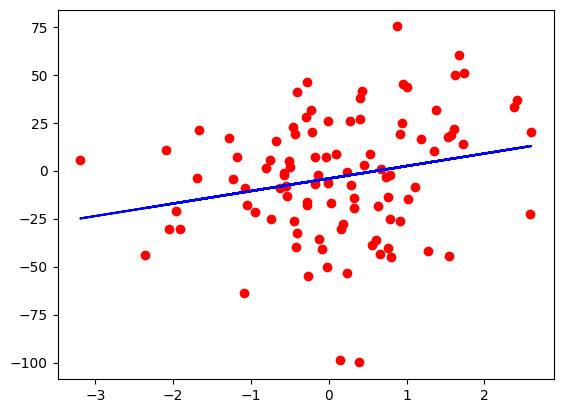

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise = 30)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
print(x)

n_samples, n_features = x.shape
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)
n = 200
learning_rate = 0.01

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n):
  y_prediction = model(x)
  l = loss(y_prediction, y)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
prediction = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, prediction, 'b')
plt.show()

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target
print(x.shape)
print(x)
print(y.shape)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

n_features = x_train.shape[1]

class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1 )
  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

loss = nn.BCELoss()
learning_rate = 0.009
n = 4000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n):
  y_predicted = model(x_train)
  l = loss(y_predicted, y_train)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
  print(f'loss = {l.item():.3f}, epoch = {epoch+1}')

with torch.no_grad():
  y_predicted = model(x_test)
  y_predicted_cls = y_predicted.round()
  print(y_predicted_cls)
  acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy = {acc*100:.4f}')

(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0

In [ ]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x), axis = 0)

x = np.array([2.0, 1, 0.1])
out = softmax(x)
print(out)

x = torch.tensor([2.0, 1, 0.1])
out = torch.softmax(x, dim=0)
print(out)

def cross_entropy(actual, predicted):
  loss = -np.sum(actual*np.log(predicted))
  return loss

y = np.array([1.0, 0, 0])

y_pred_good = np.array([0.7, 0.2, 0.1])
y_pred_bad = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(y, y_pred_good)
l2 = cross_entropy(y, y_pred_bad)
print(f'{l1:.4f}')
print(f'{l2:.4f}')


[0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])
0.3567
2.3026


In [ ]:
import torch
import torch.nn as nn
import numpy as np

loss = nn.CrossEntropyLoss()
y = torch.tensor([2, 0, 1])

y_pred_good = torch.tensor([[0.1, 1, 2.1], [2, 1, 0.1], [0.1, 3, 0.1]])
y_pred_bad = torch.tensor([[2.1, 1, 0.1], [0.1, 1, 2.1], [0.1, 3, 0.1]])

l1 = loss(y_pred_good, y)
l2 = loss(y_pred_bad, y)

print(l1.item())
print(l2.item())

0.3018244206905365
1.6241613626480103


In [ ]:
_, predictions1 = torch.max(y_pred_good, 1)
_, predictions2 = torch.max(y_pred_bad, 1)
print(predictions1)
print(predictions2)

tensor([2, 0, 1])
tensor([0, 2, 1])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
  def __init__(self, input_size, hiddeen_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    return out

# OR

class NeuralNet(nn.Module):
  def __init__(self, input_size, hiddeen_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, 1)


  def forward(self, x):
    out = torch.relu(self.linear1(x))
    out = torch.sigmoid(self.linear2(out))
    return out


torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch : 1/15 , step : 100/600, loss: 0.2792
epoch : 1/15 , step : 200/600, loss: 0.2422
epoch : 1/15 , step : 300/600, loss: 0.2438
epoch : 1/15 , step : 400/600, loss: 0.2841
epoch : 1/15 , step : 500/600, loss: 0.1167
epoch : 1/15 , step : 600/600, loss: 0.1133
epoch : 2/15 , step : 100/600, loss: 0.1523
epoch : 2/15 , step : 200/600, loss: 0.2021
epoch : 2/15 , step : 300/600, loss: 0.0722
epoch : 2/15 , step : 400/600, loss: 0.0724
epoch : 2/15 , step : 500/600, loss: 0.1536
epoch : 2/15 , step : 600/600, loss: 0.1134
epoch : 3/15 , step : 100/600, loss: 0.0774
epoch : 3/15 , step : 200/600, loss: 0.0717
epoch : 3/15 , step : 300/600, loss: 0.0964
epoch : 3/15 , step : 400/600, loss: 0.1094
epoch : 3/15 , step : 500/600, loss: 0.0735
epoch : 3/15 , step : 600/600, loss: 0.0769
epoch : 4/15 , step : 100/600, loss: 0.0945
epoch : 4/15 , step : 200/600, loss: 0.0519
epoch : 4/15 , step : 300/600, loss: 0.0555
epoch : 4/15 , step : 400/600

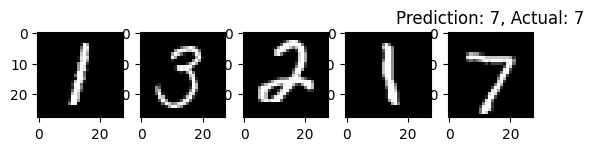

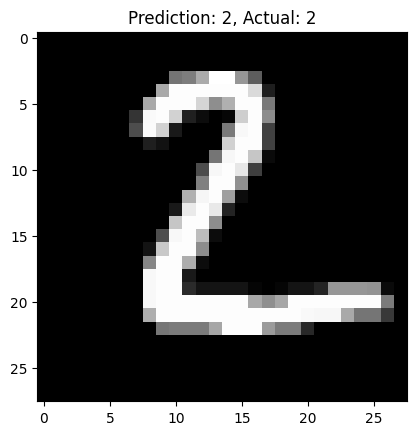

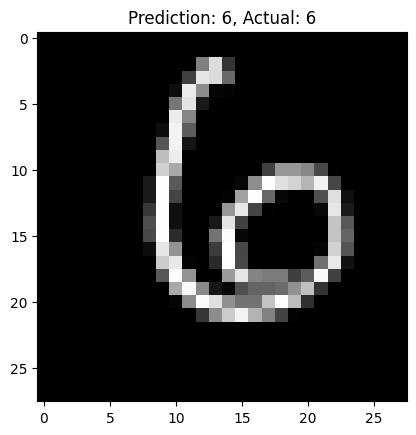

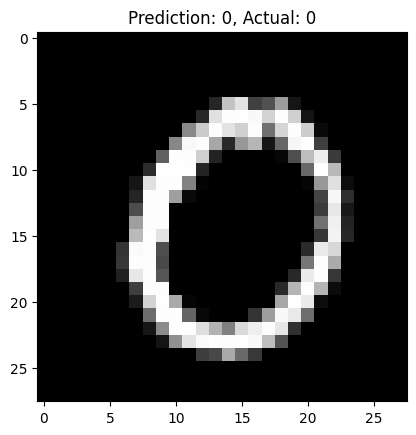

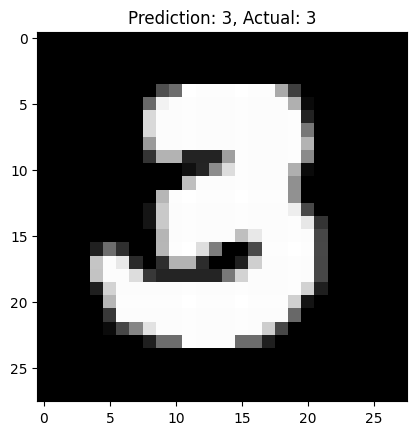

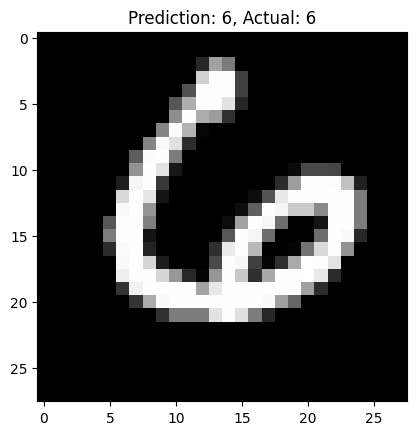

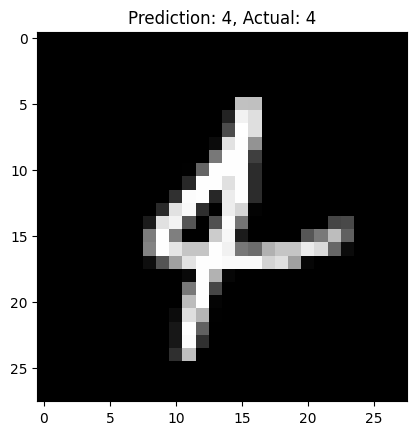

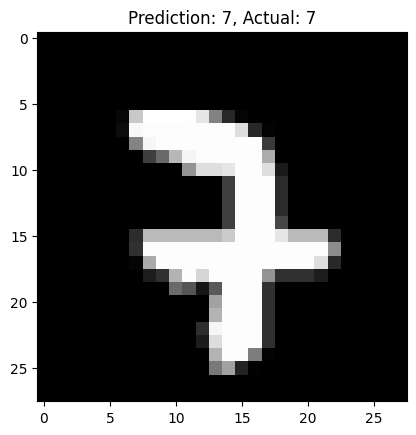

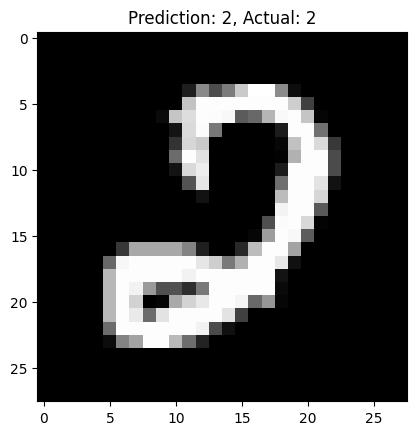

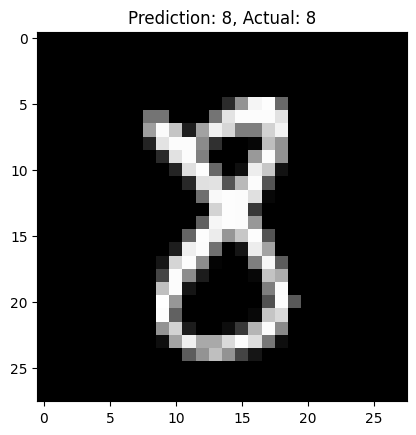

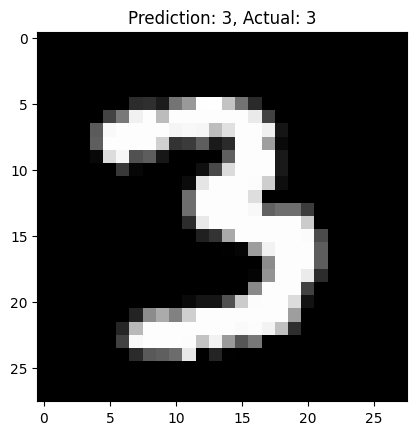

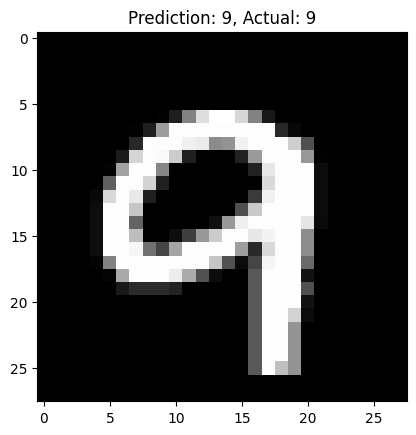

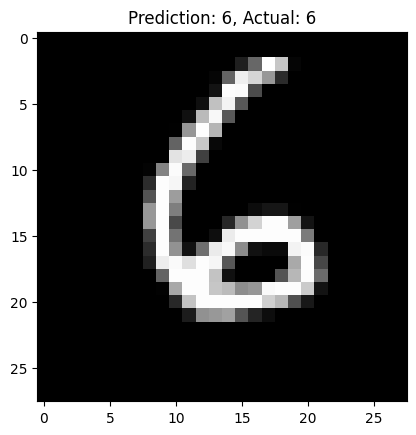

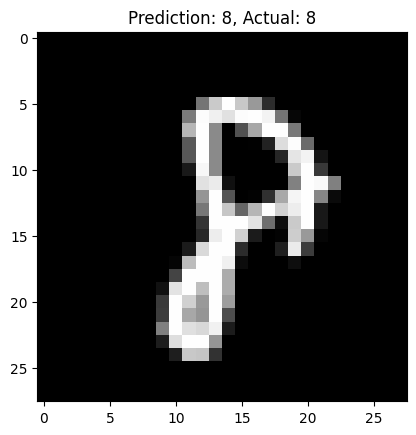

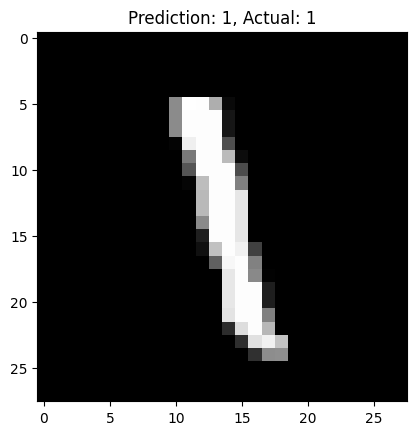

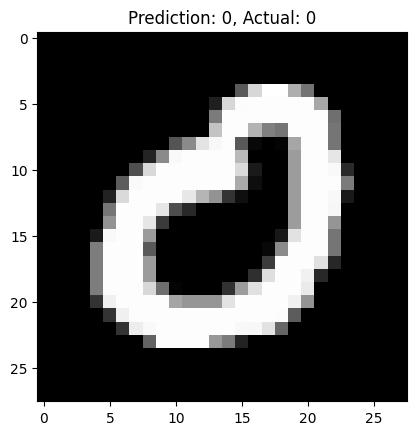

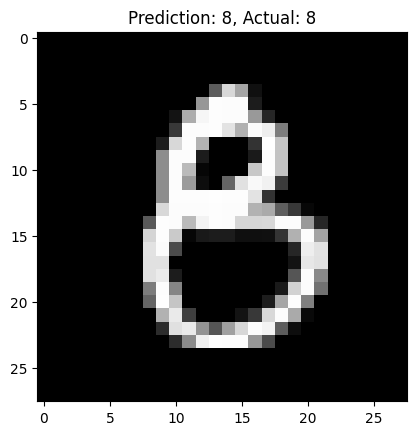

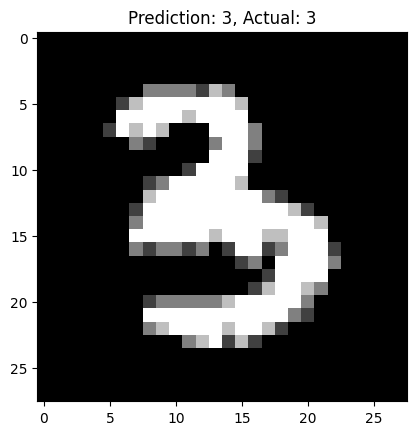

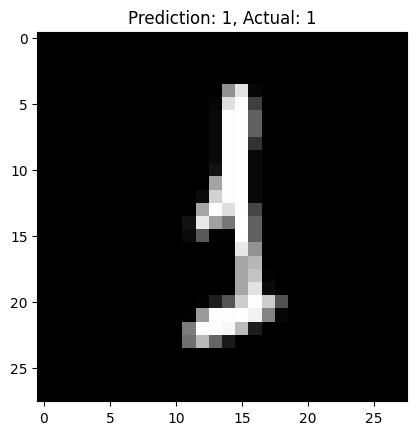

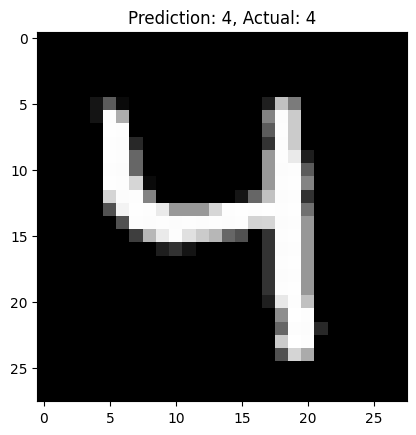

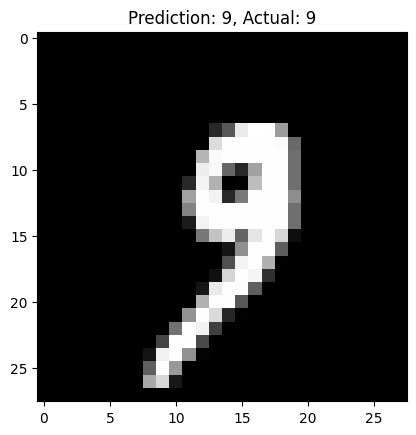

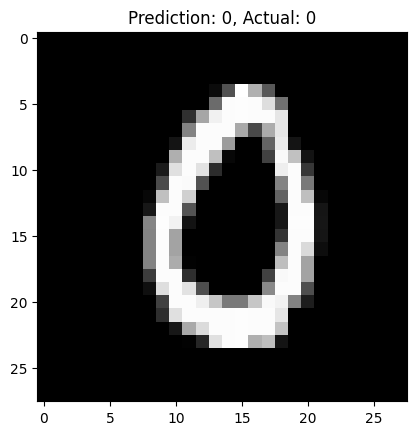

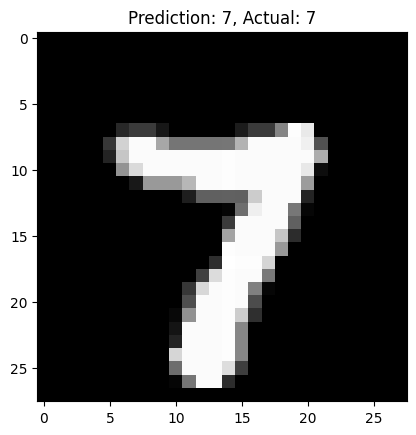

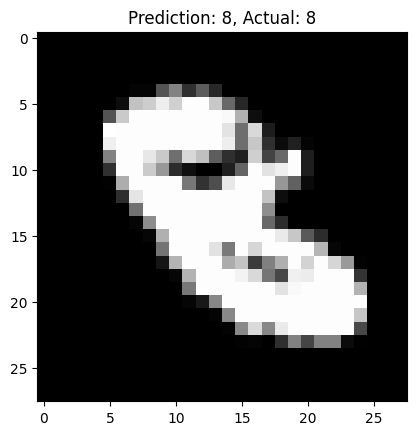

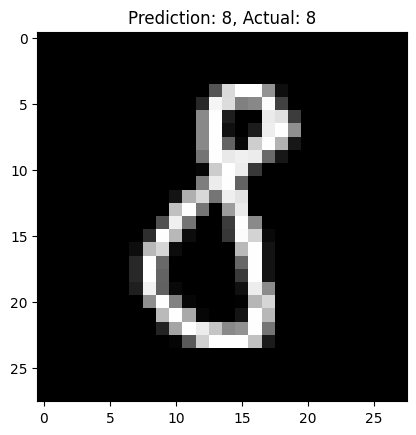

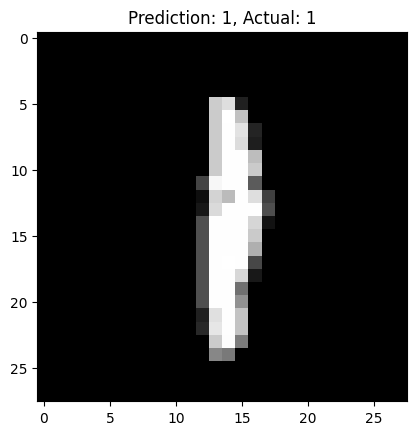

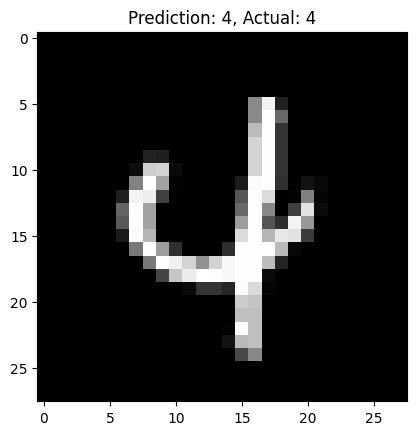

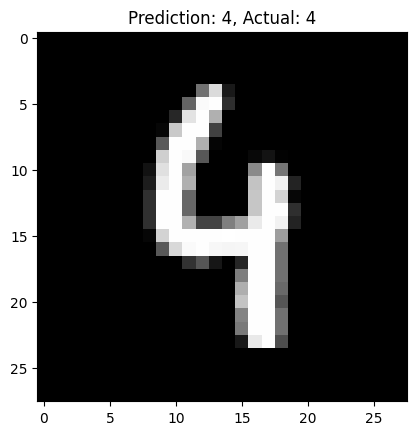

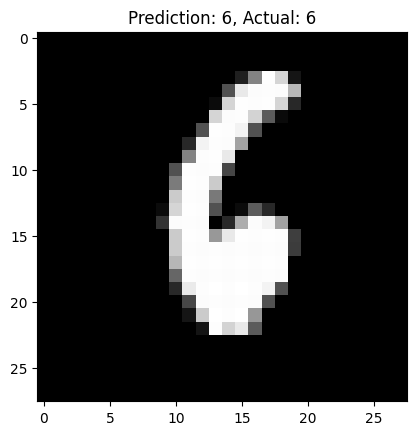

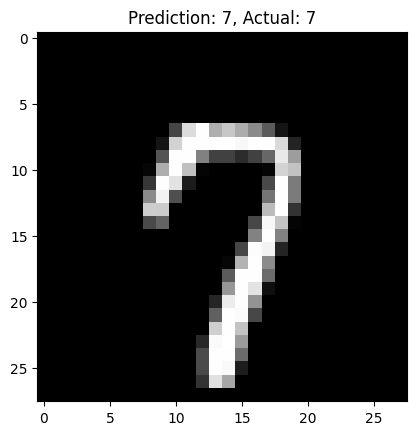

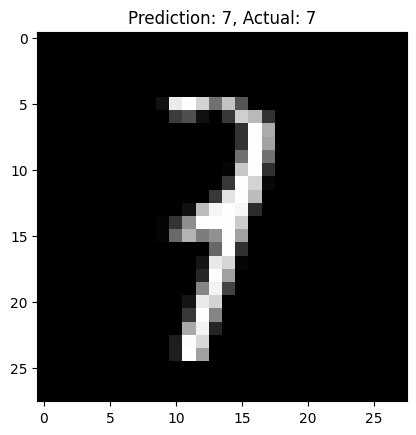

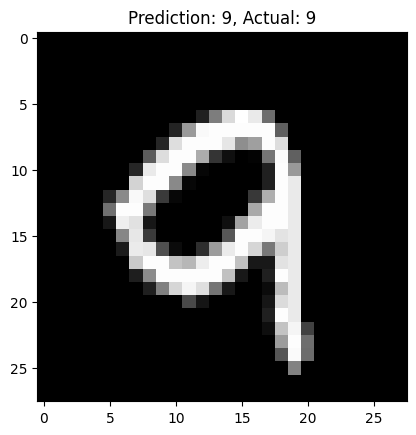

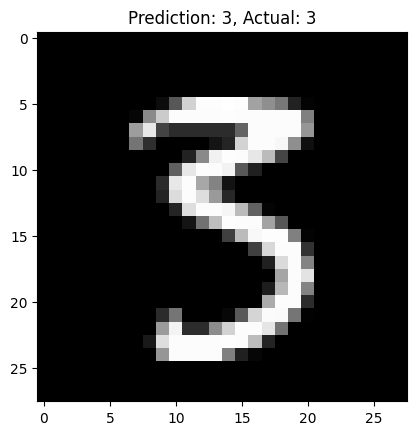

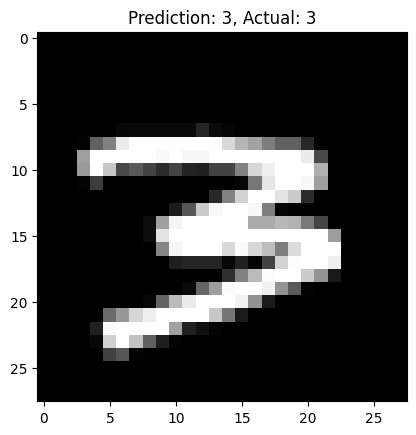

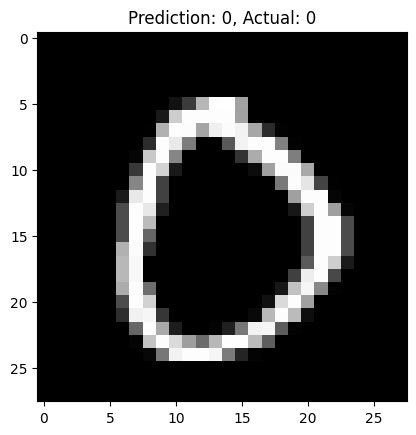

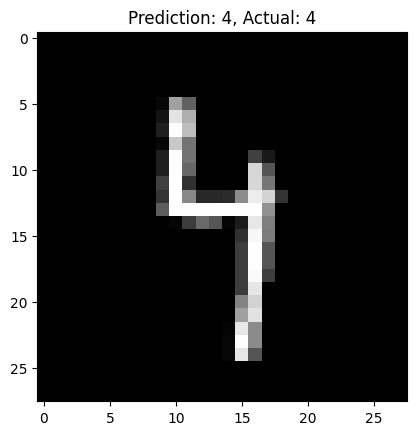

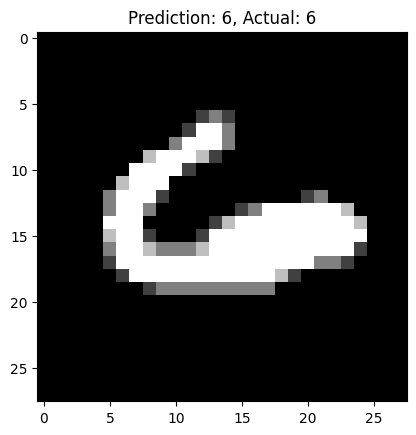

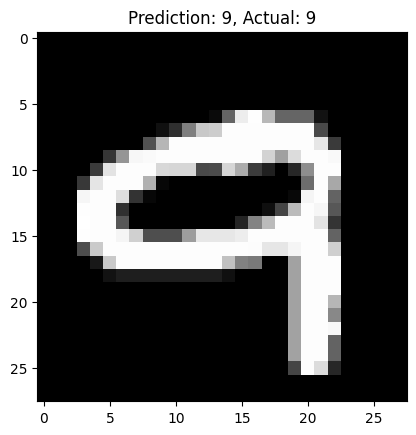

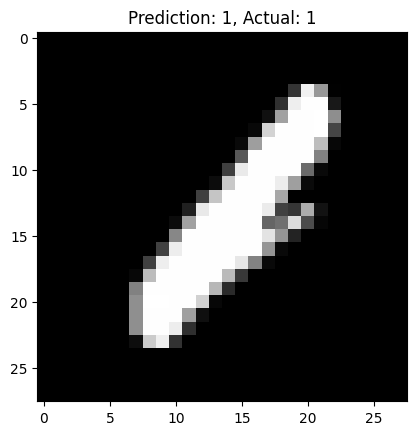

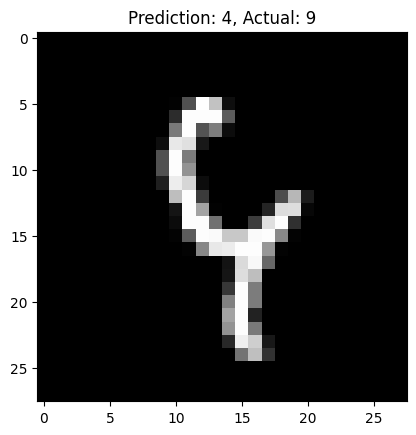

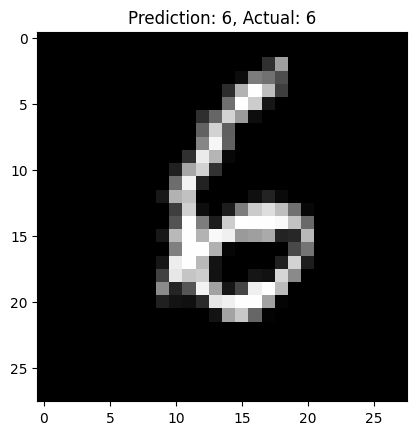

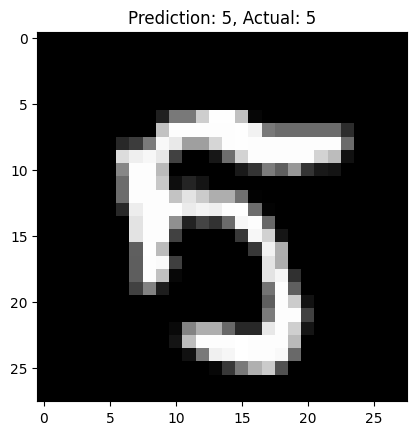

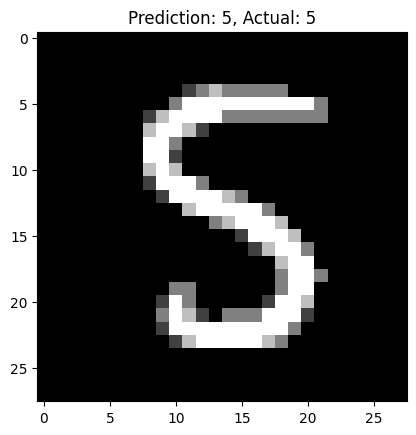

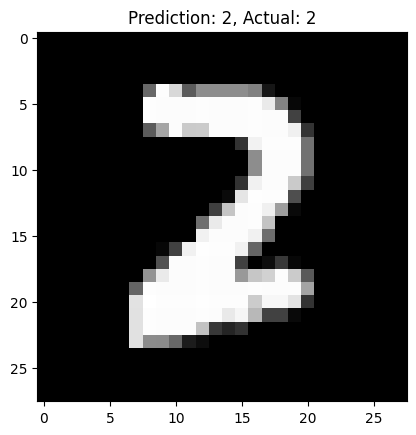

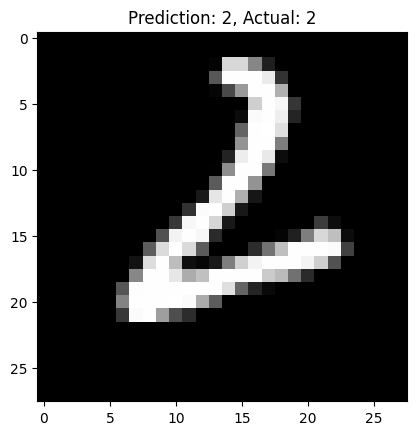

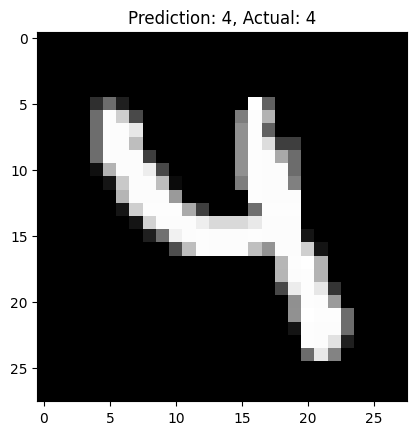

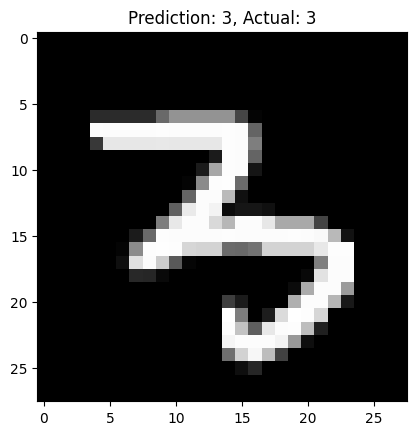

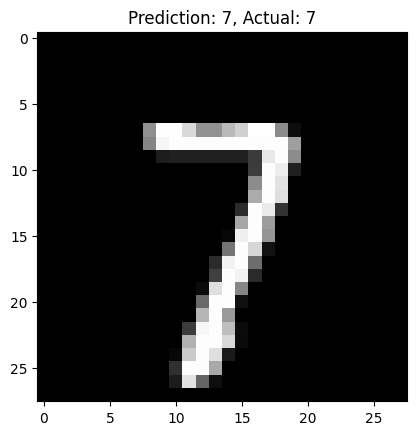

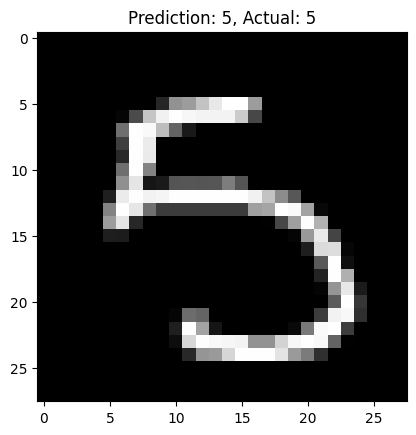

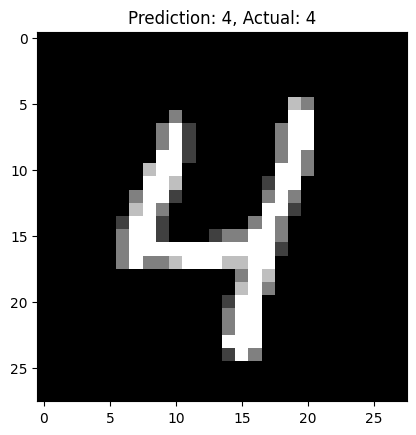

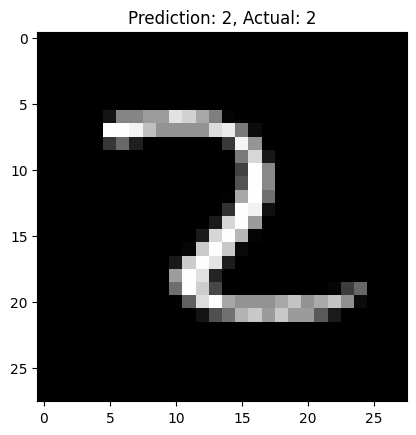

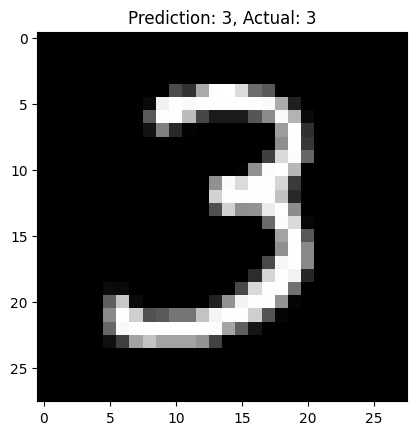

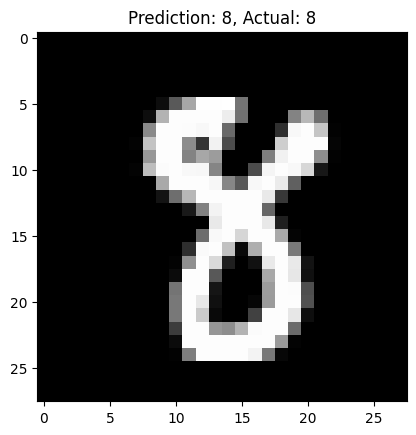

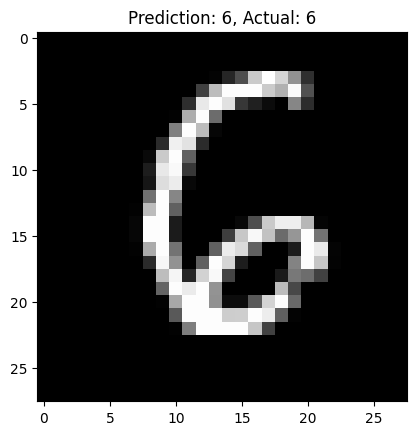

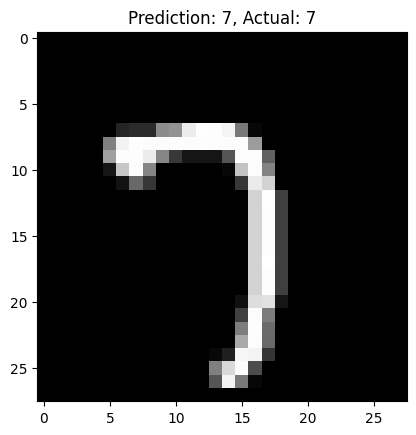

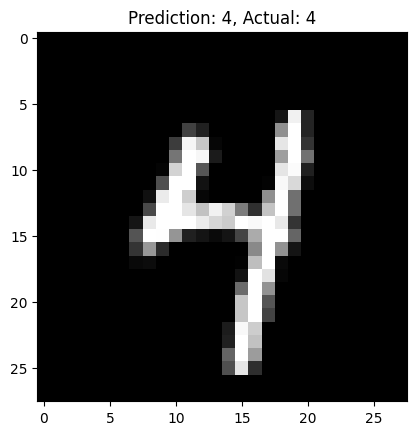

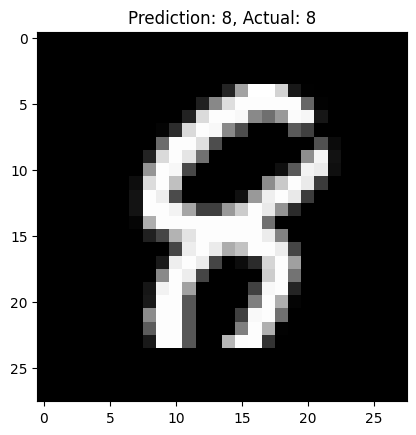

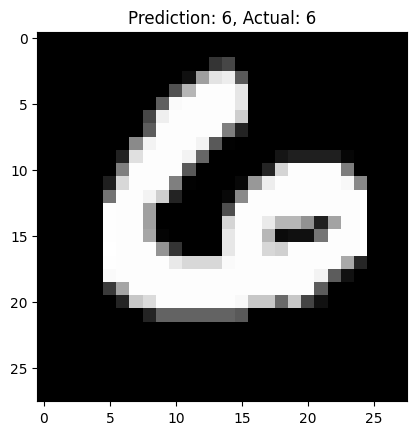

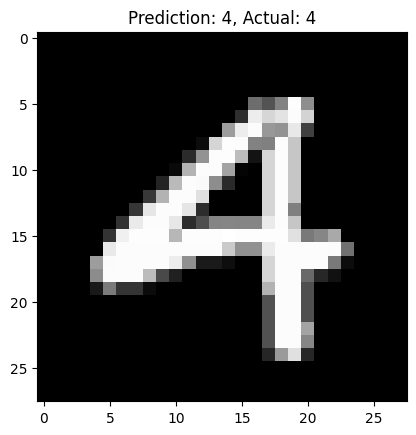

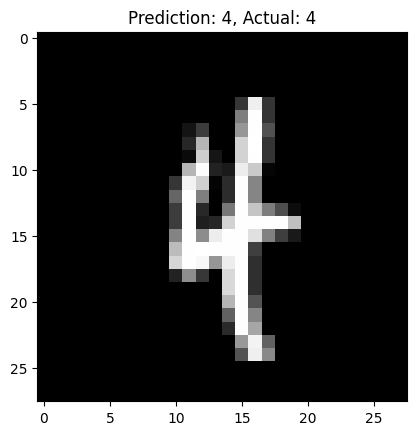

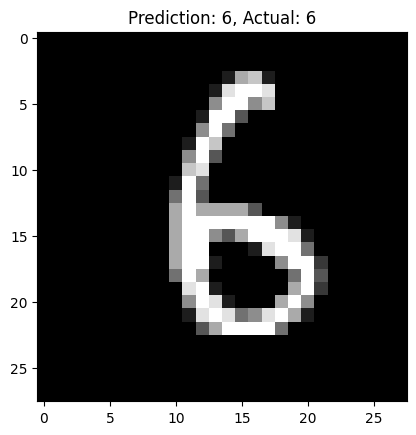

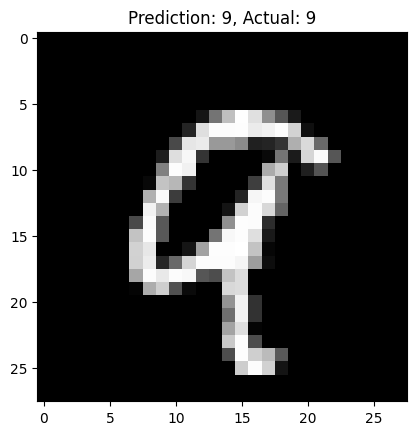

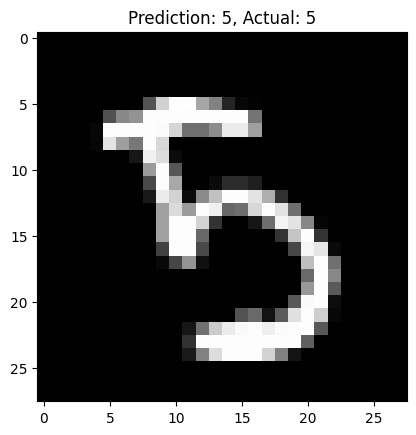

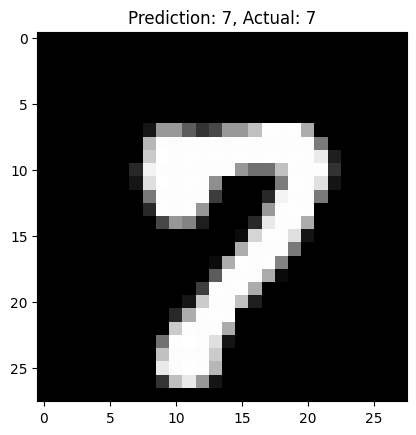

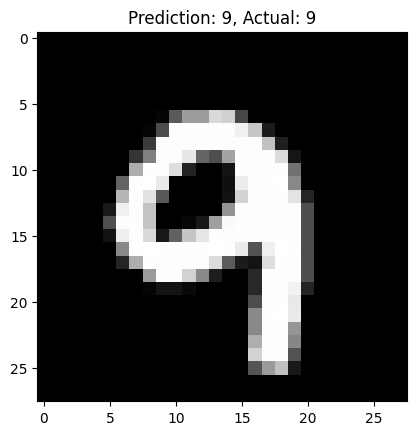

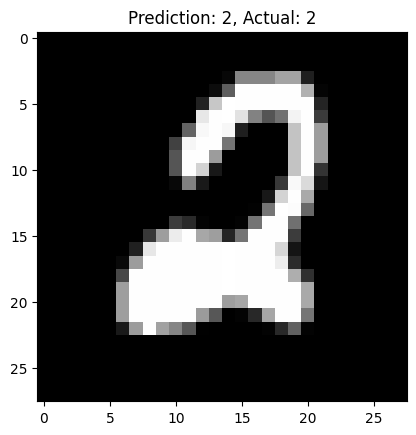

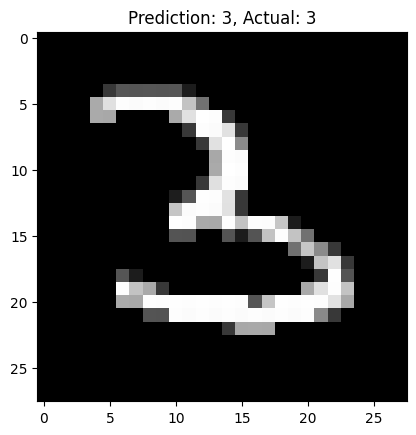

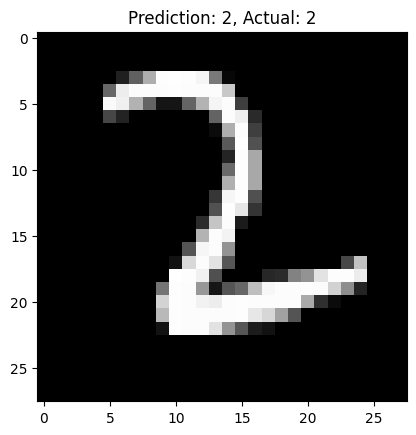

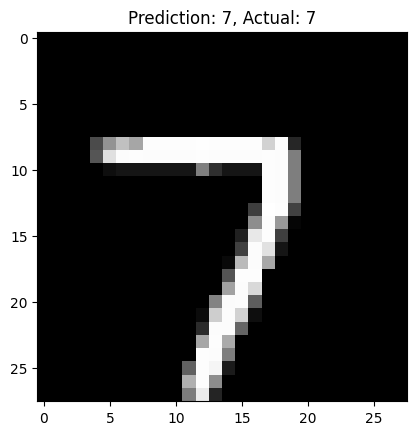

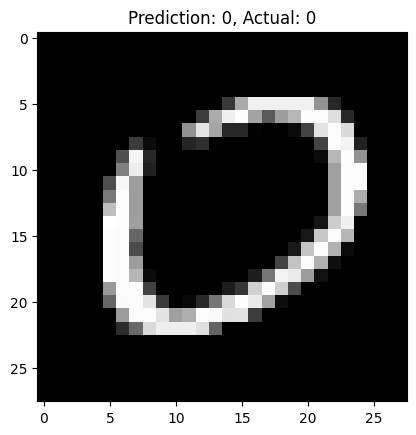

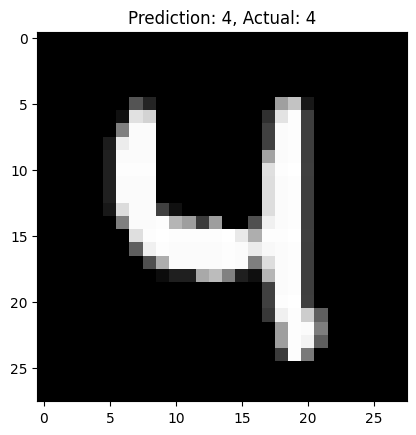

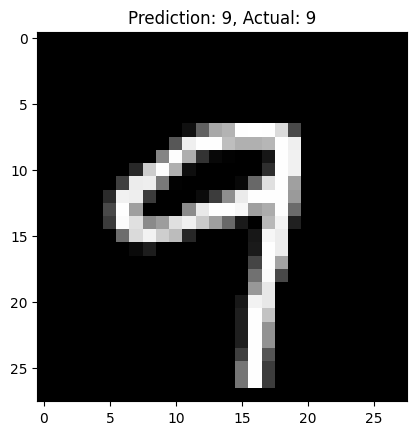

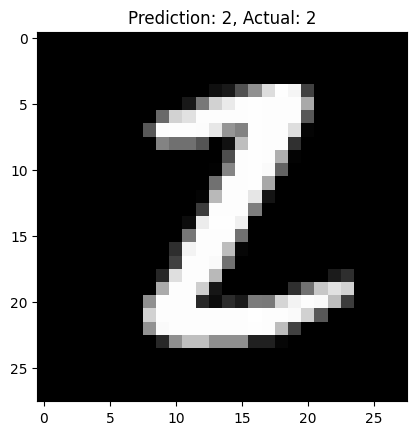

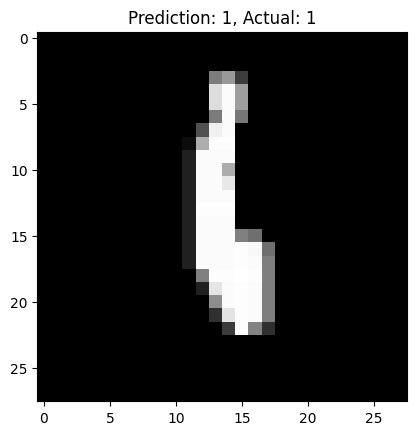

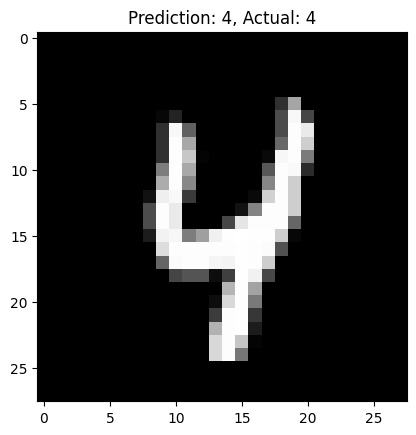

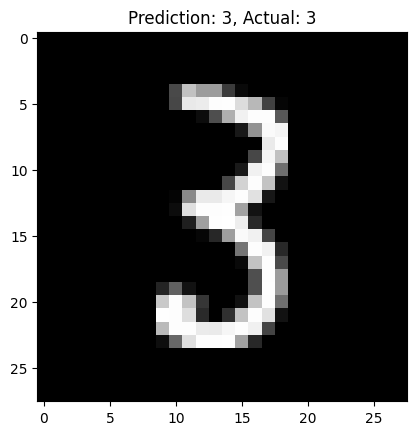

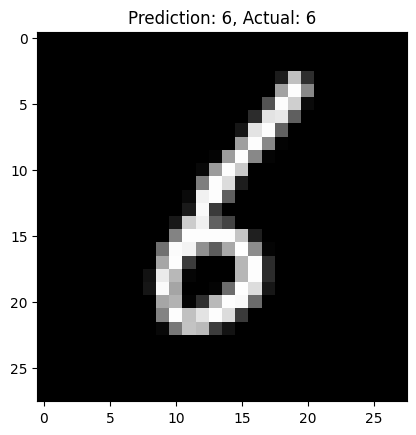

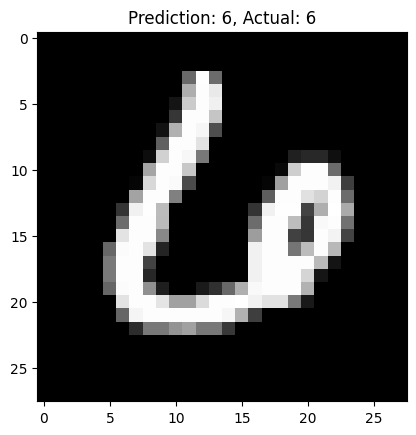

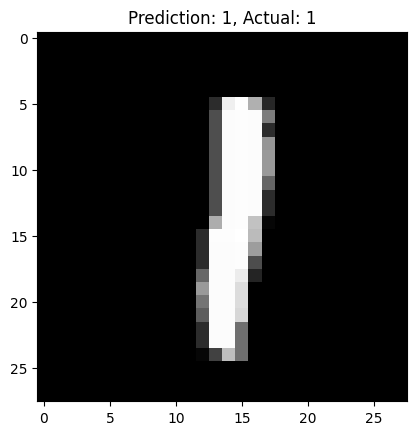

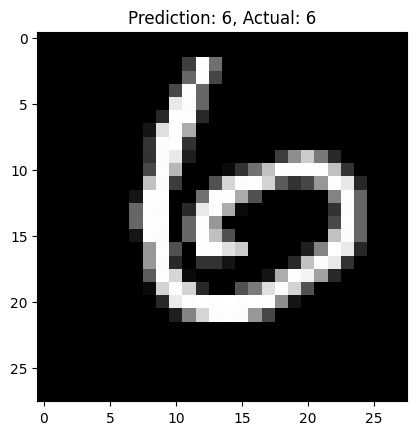

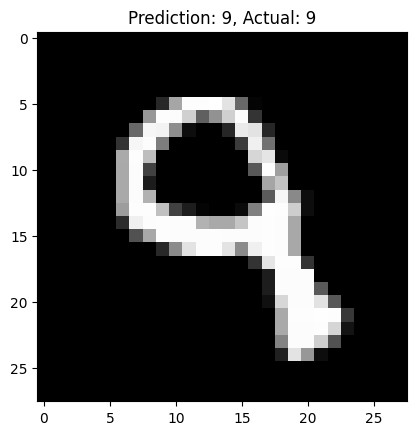

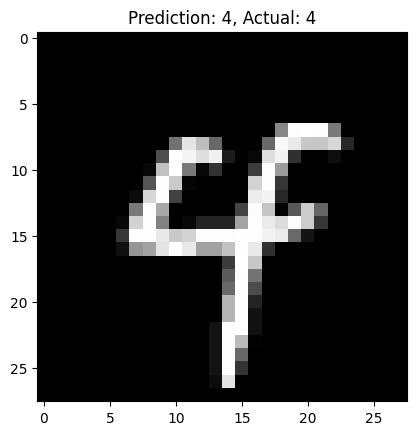

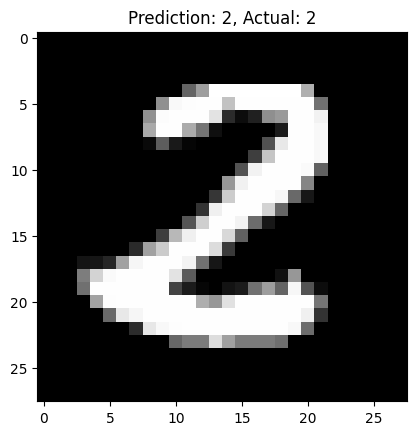

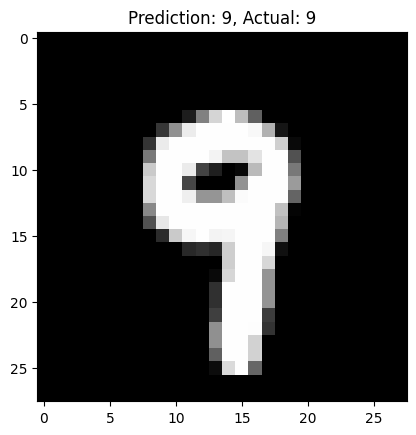

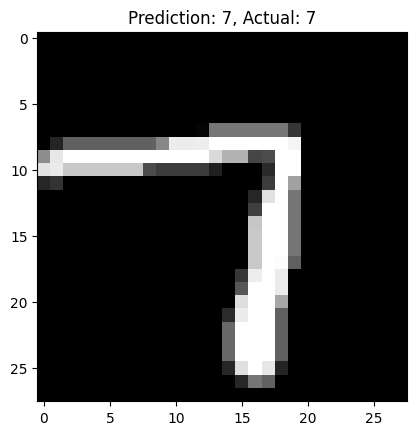

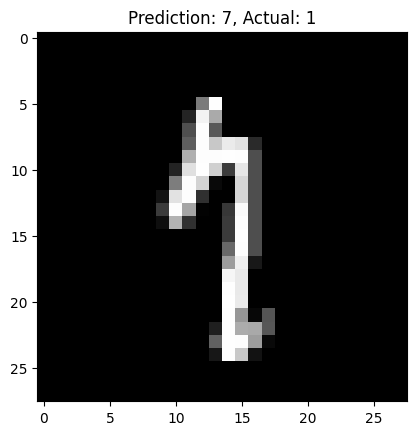

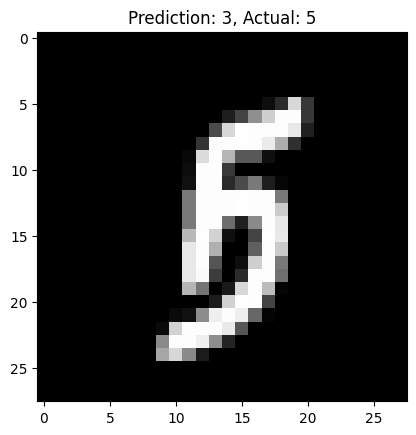

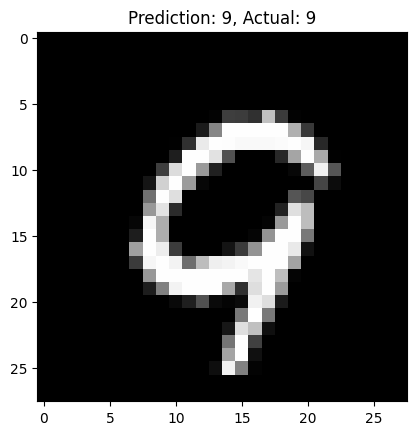

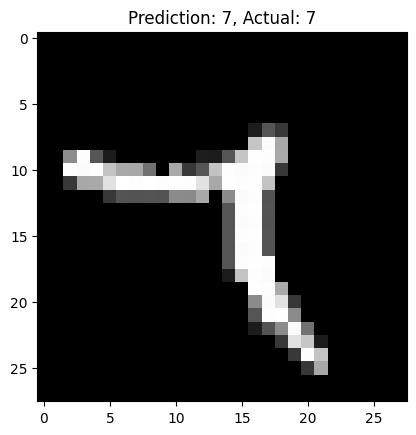

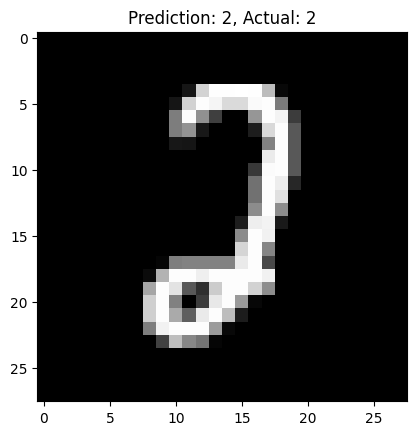

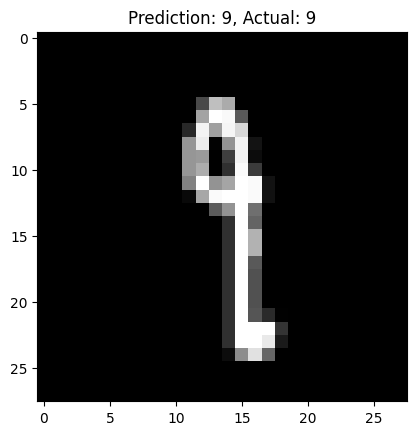

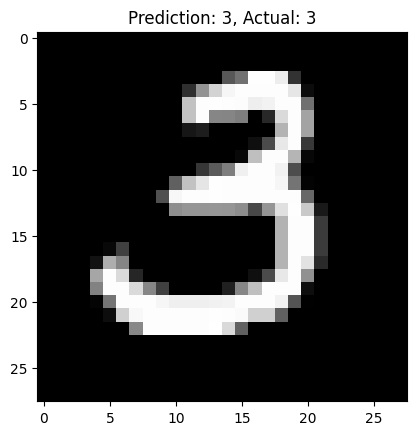

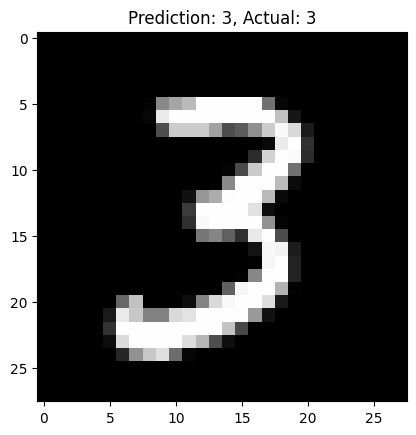

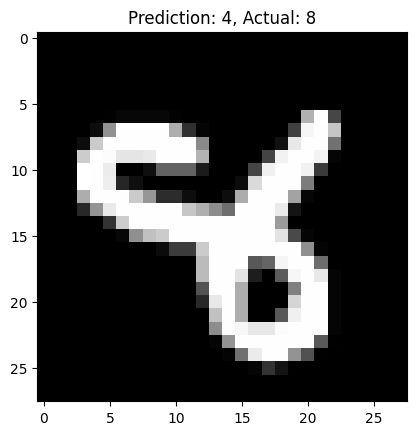

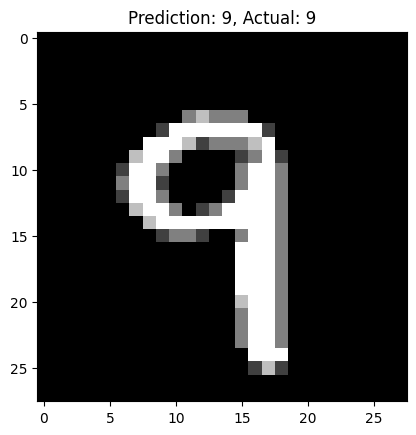

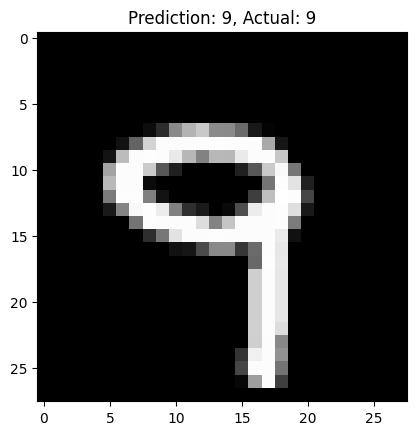

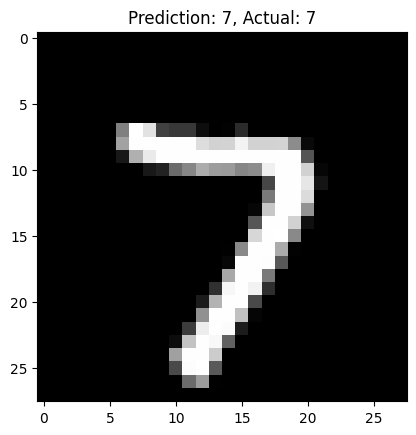

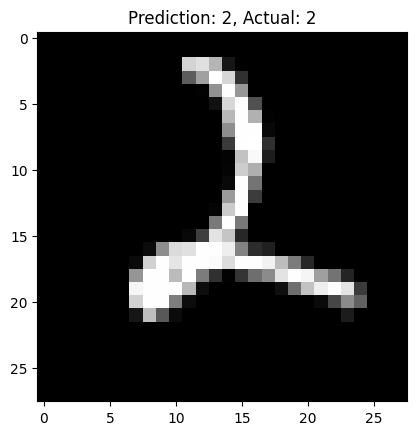

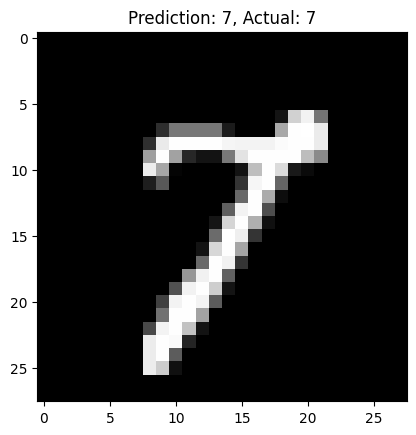

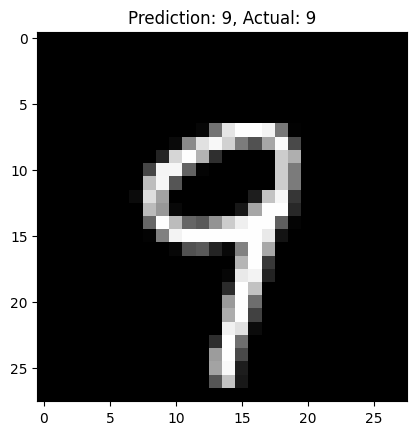

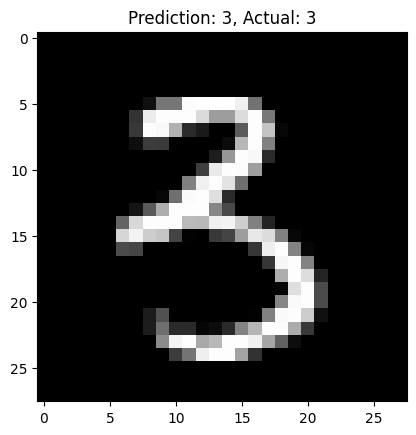

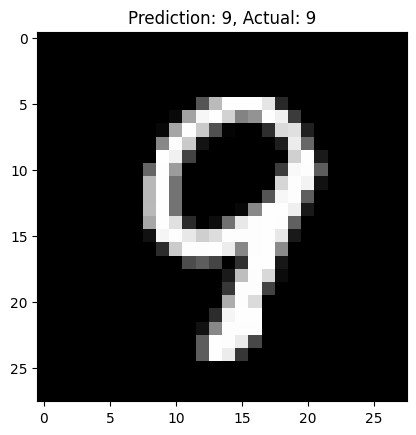

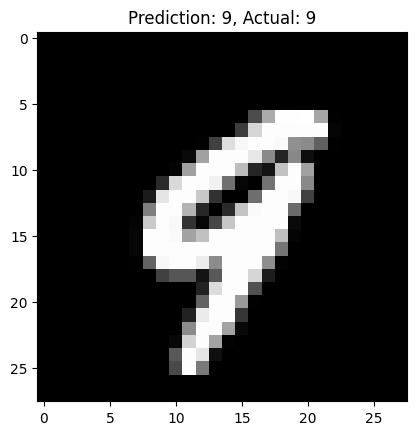

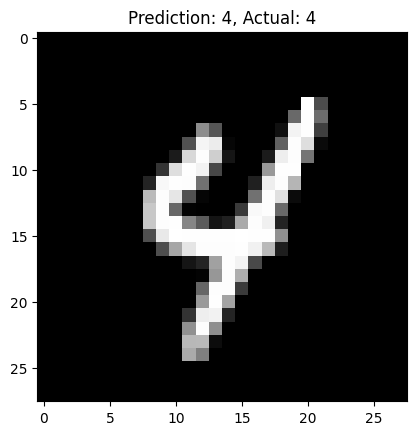

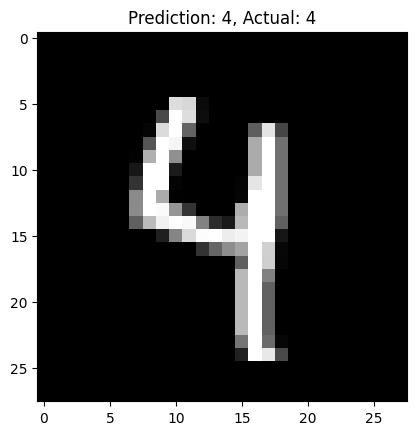

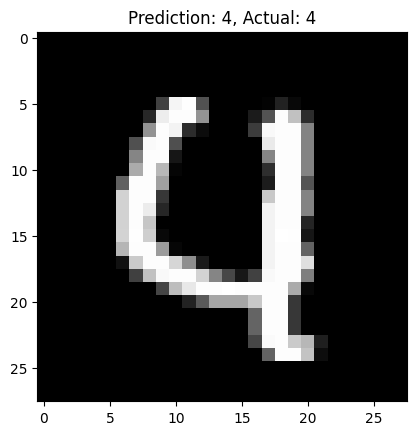

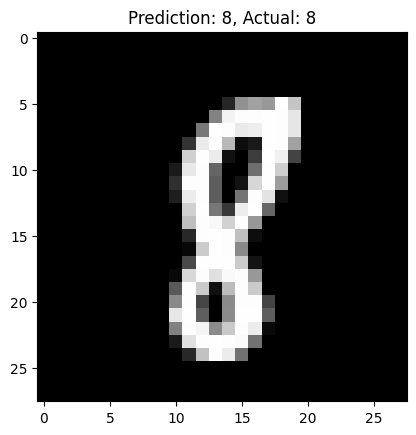

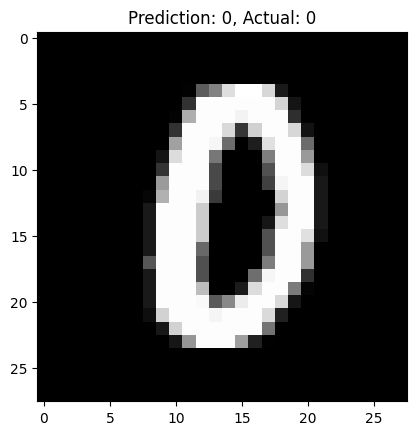

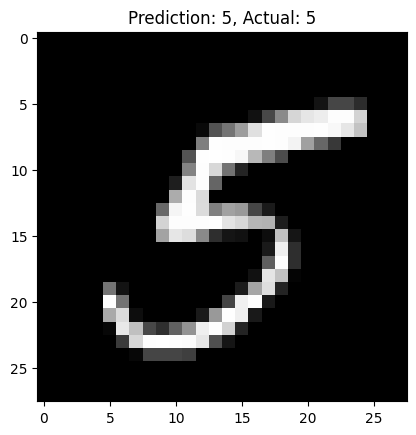

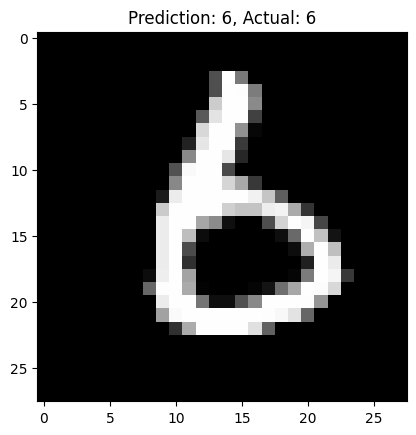

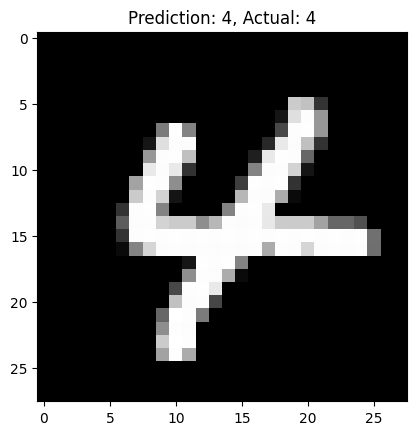

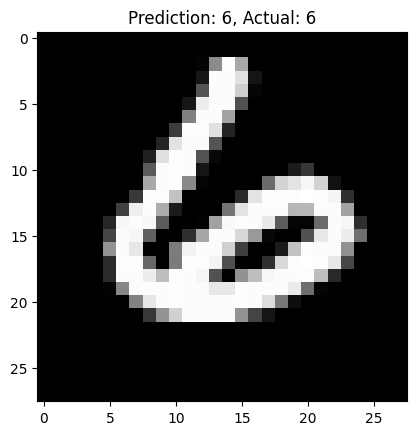

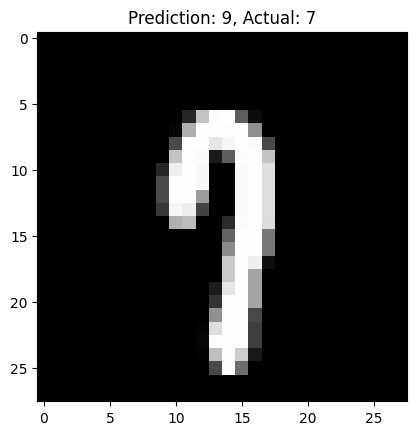

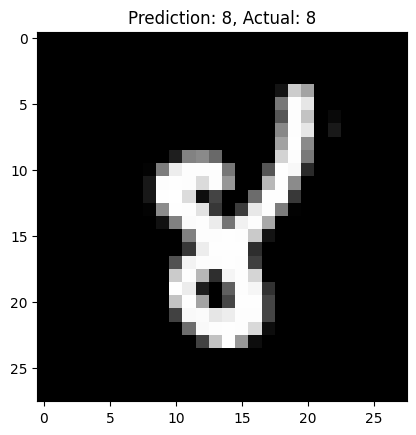

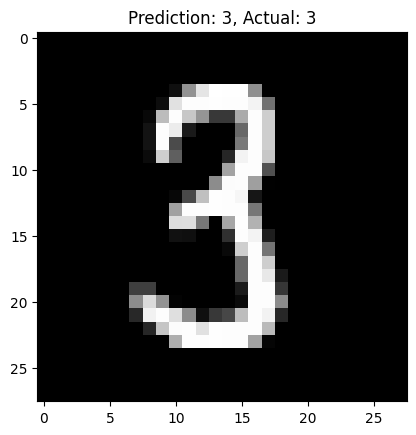

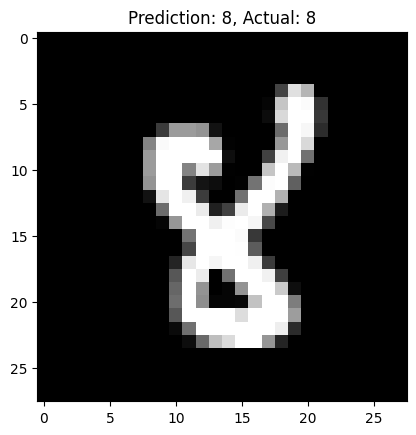

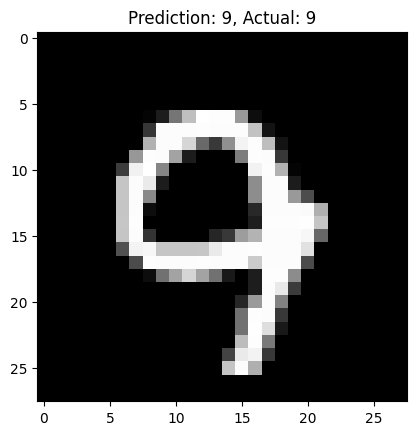

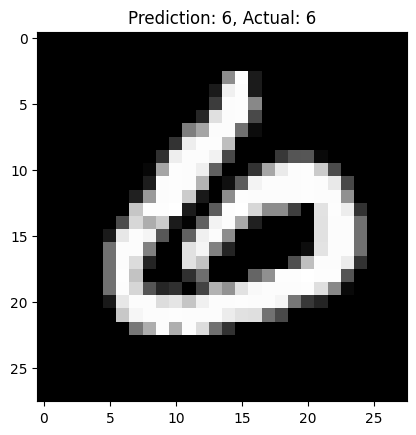

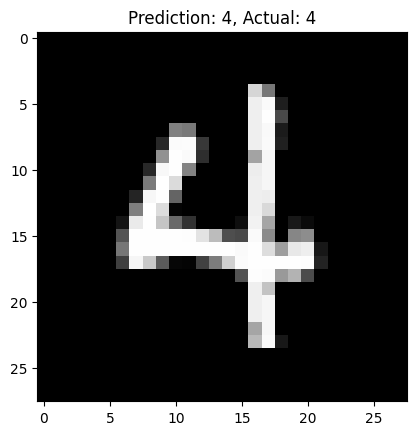

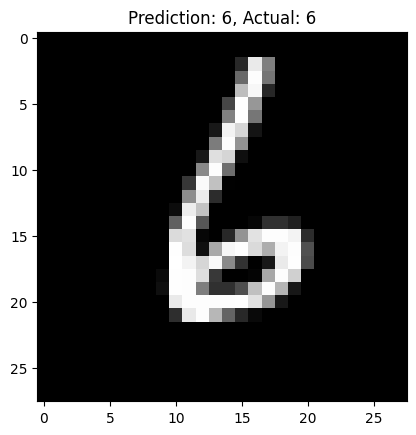

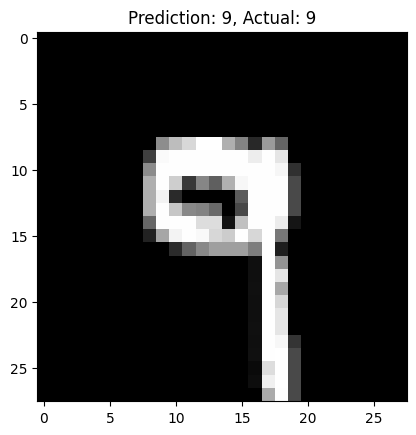

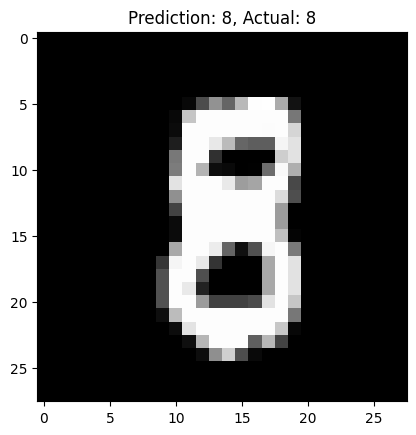

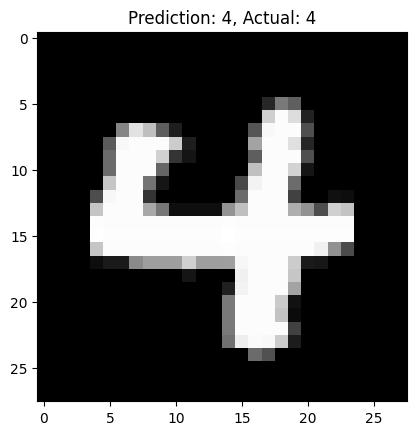

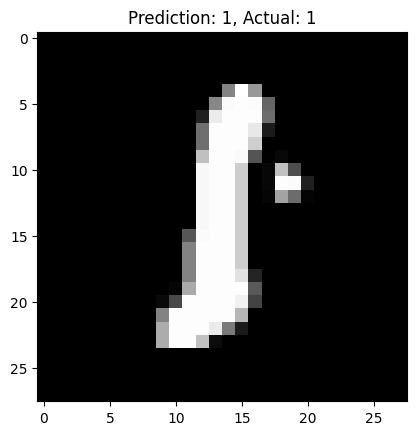

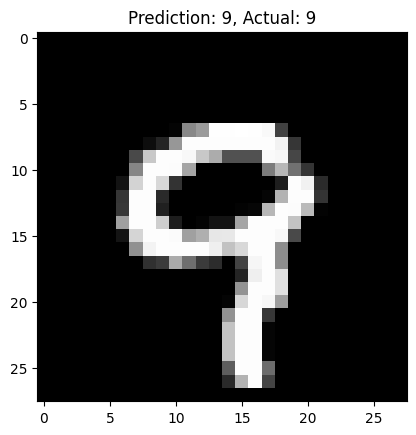

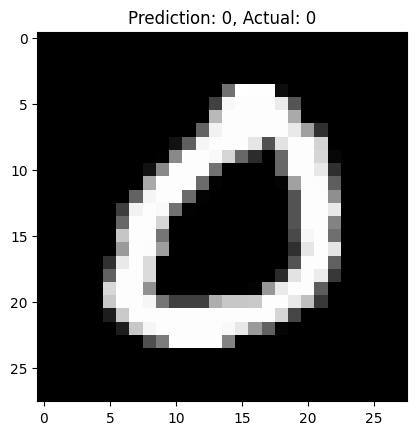

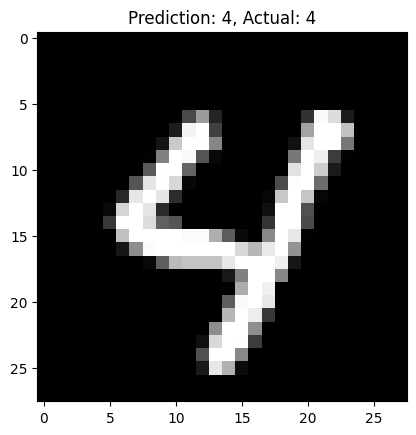

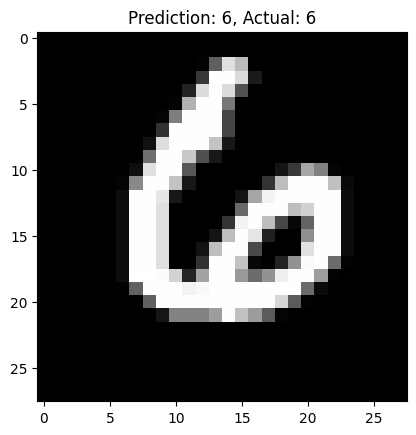

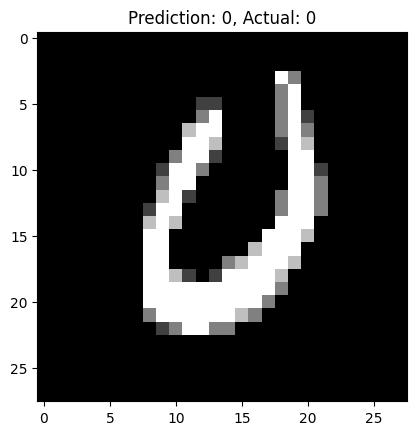

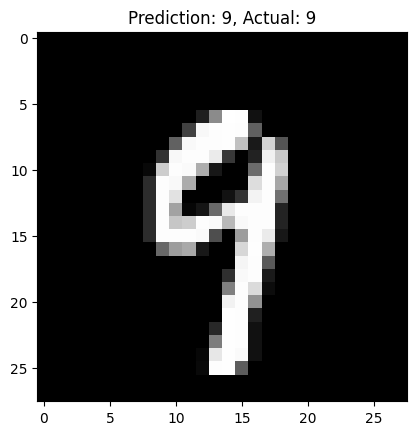

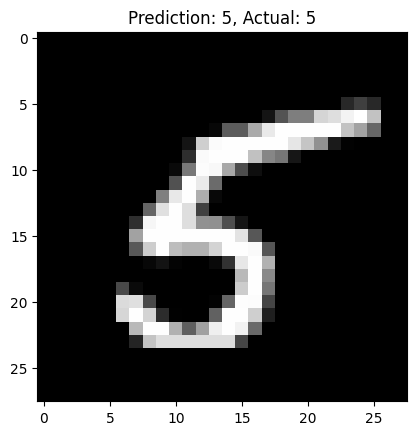

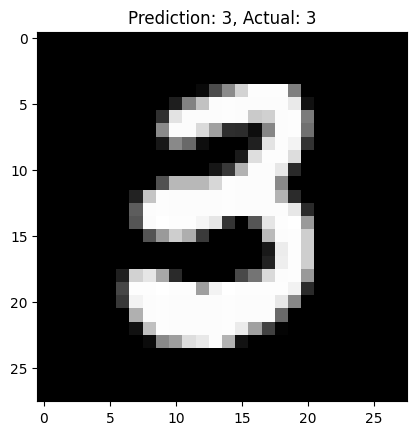

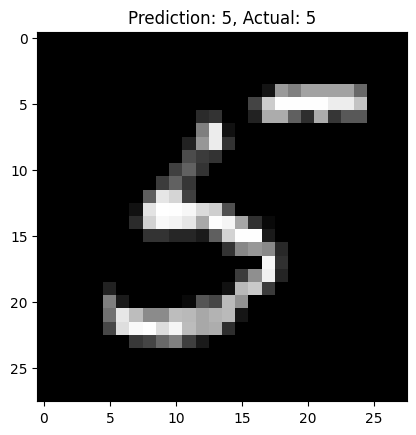

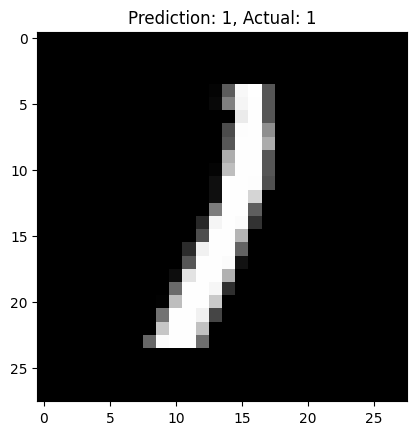

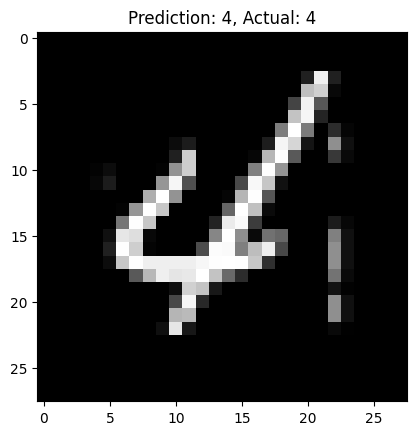

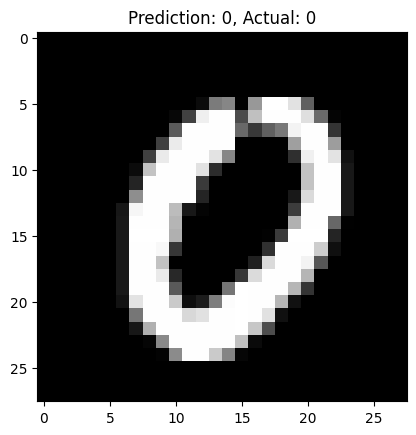

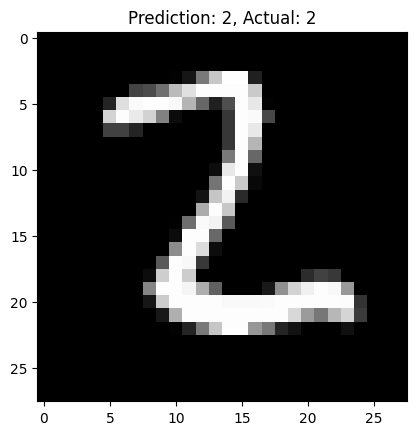

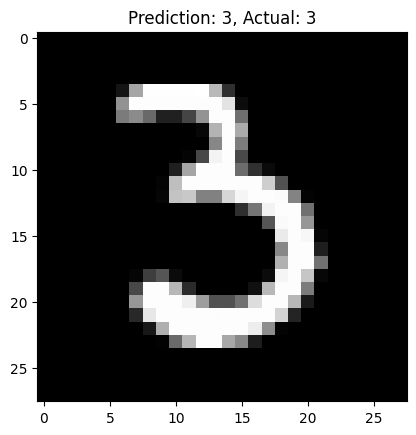

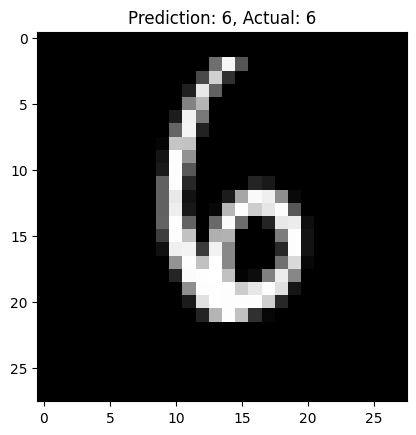

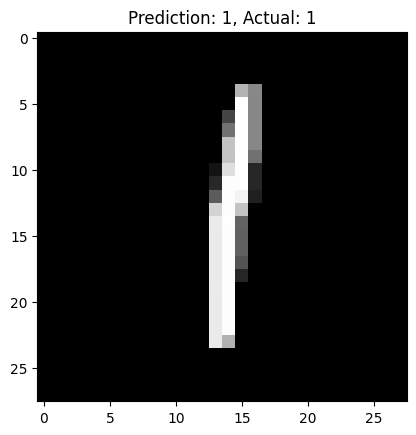

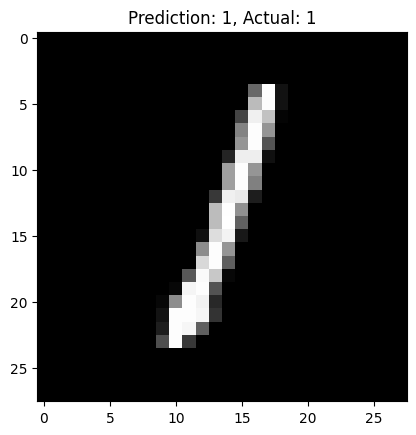

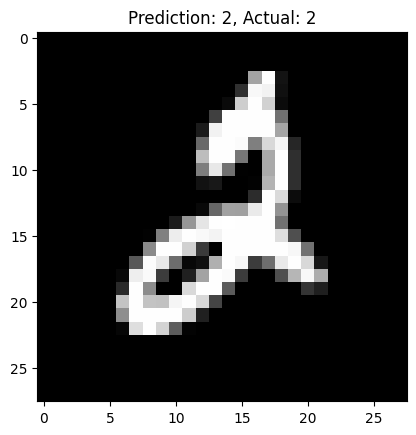

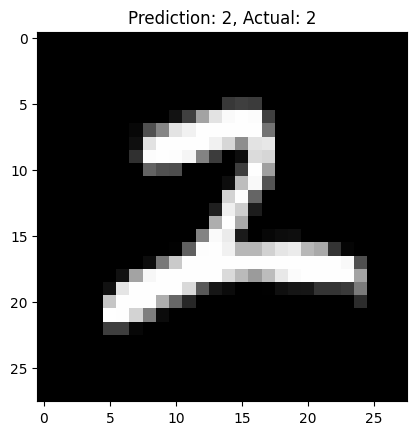

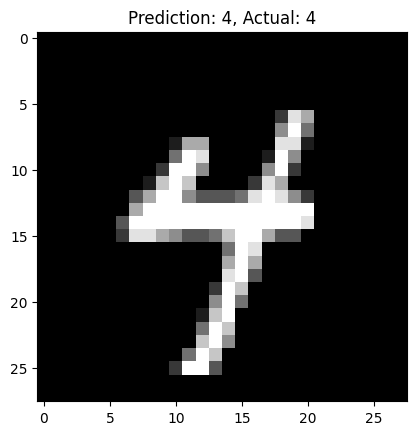

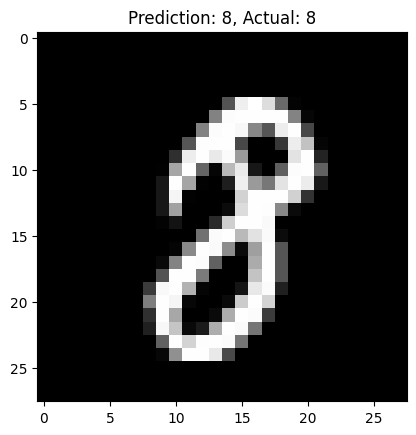

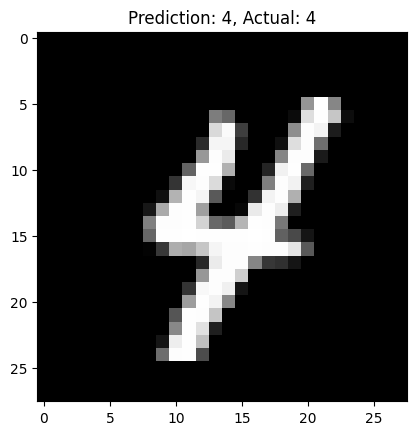

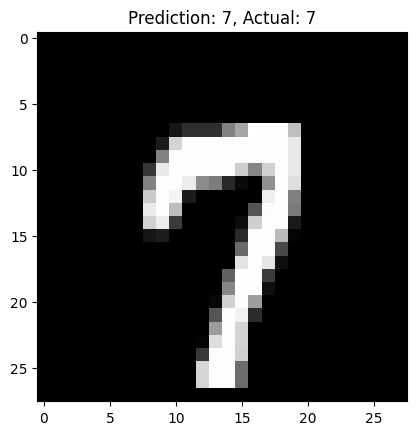

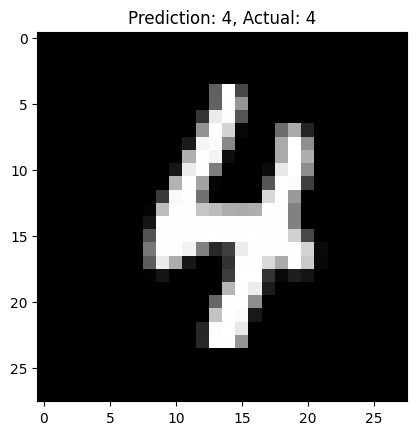

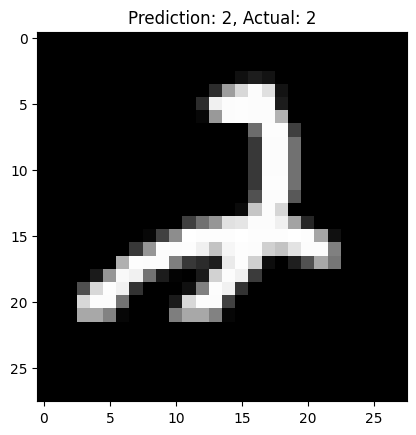

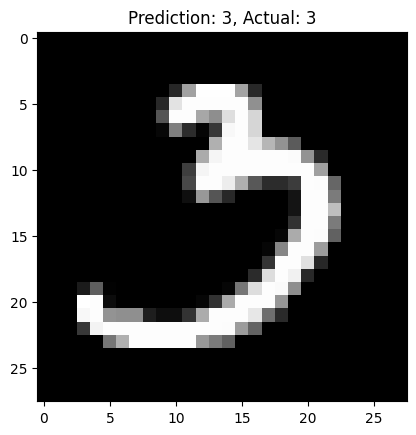

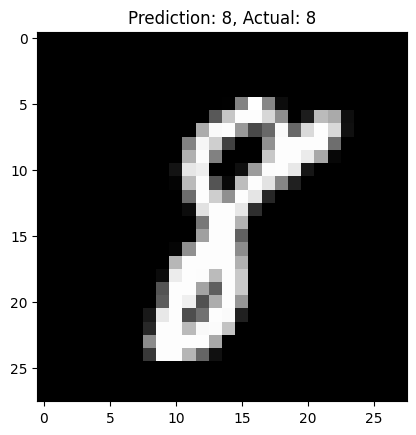

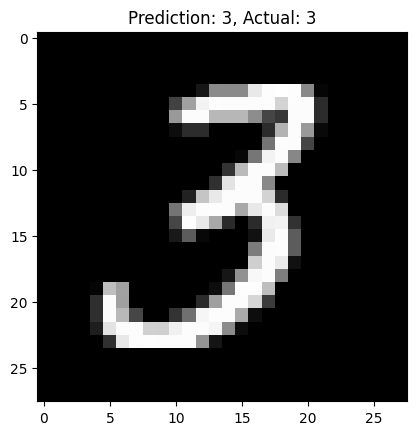

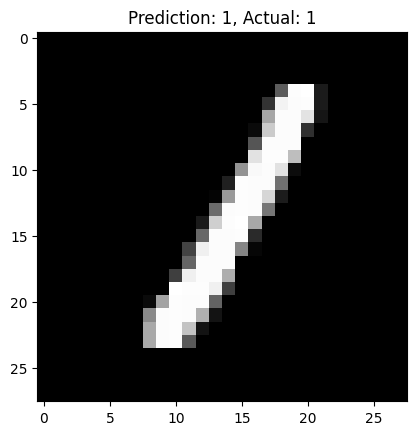

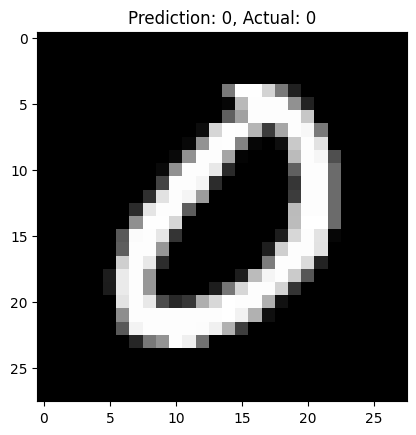

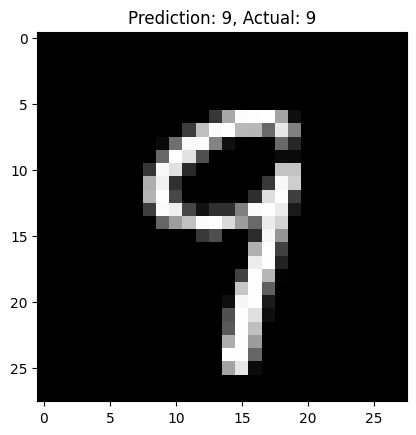

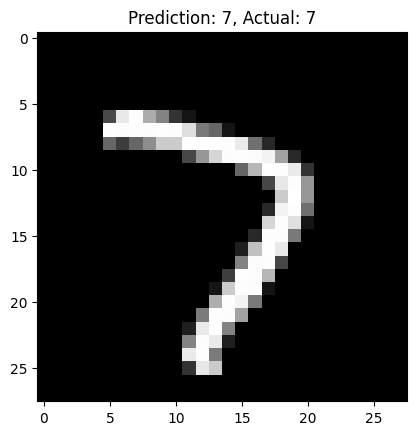

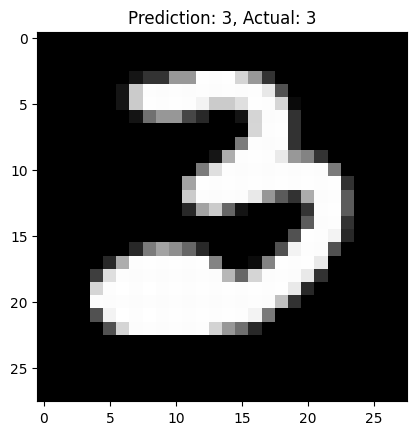

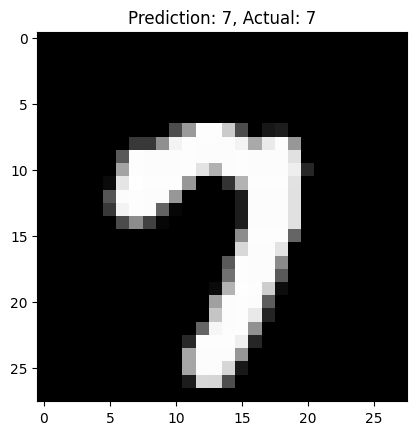

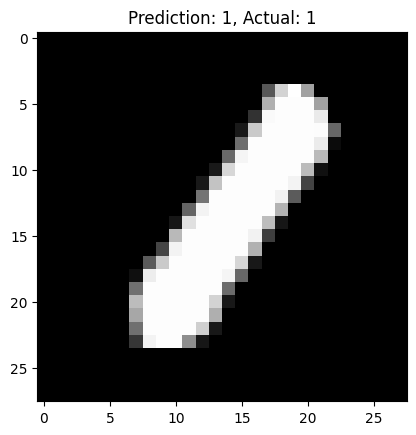

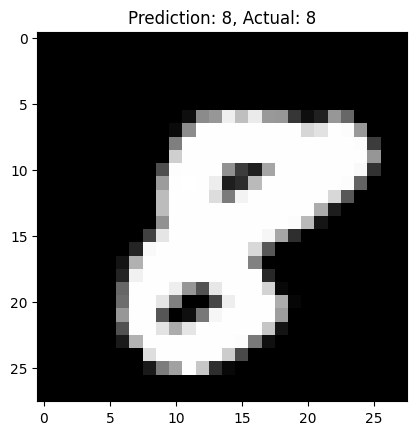

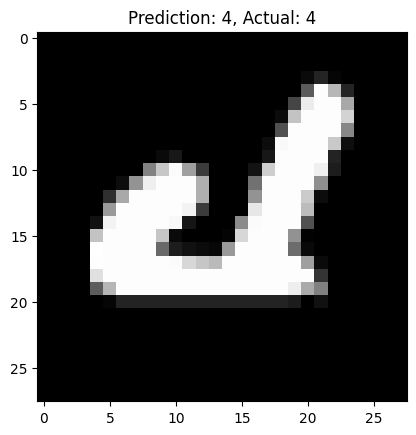

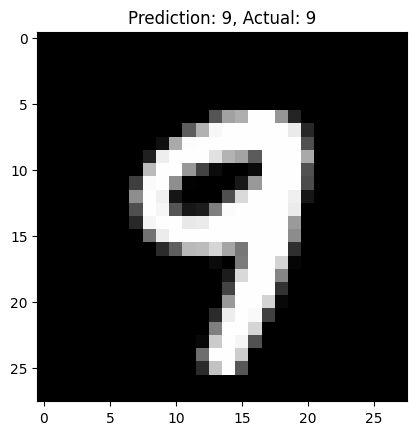

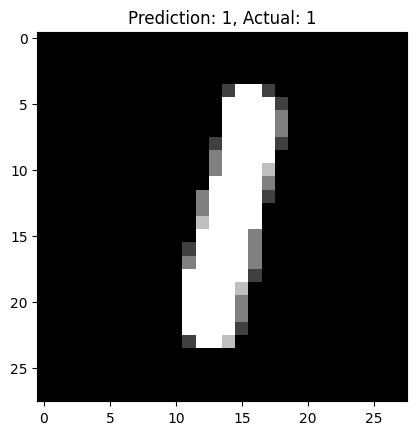

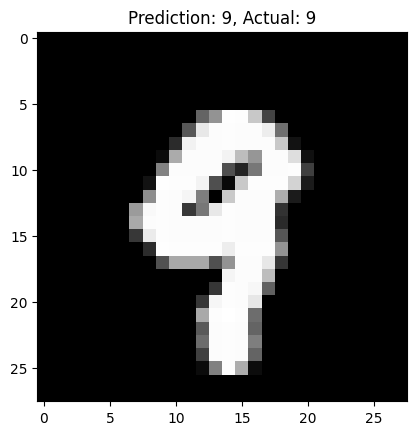

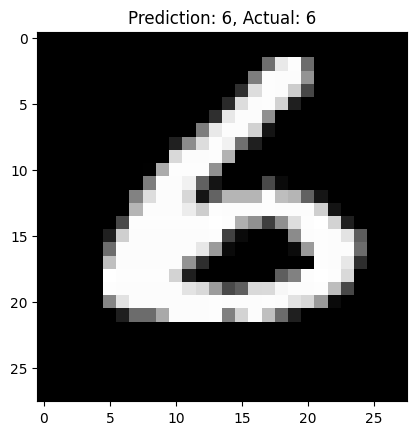

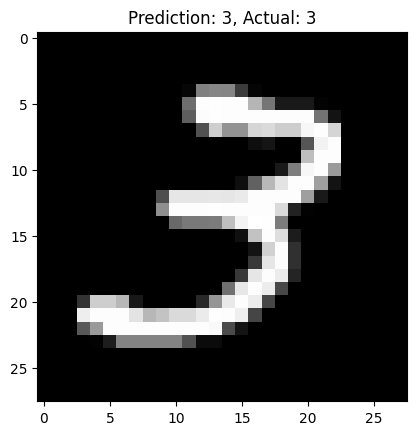

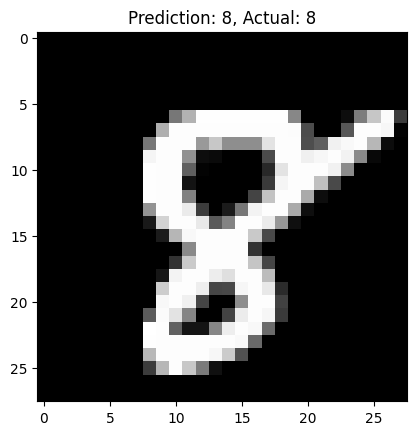

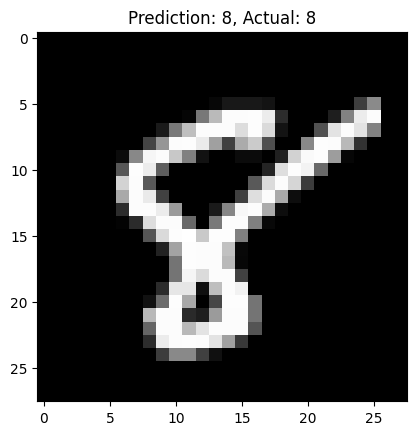

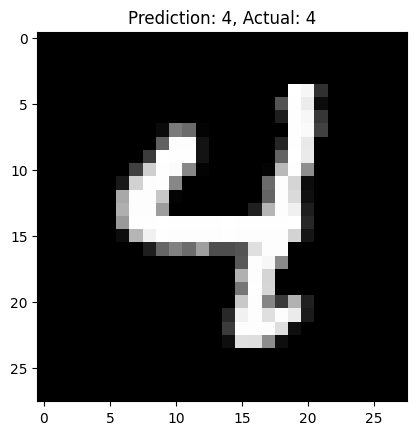

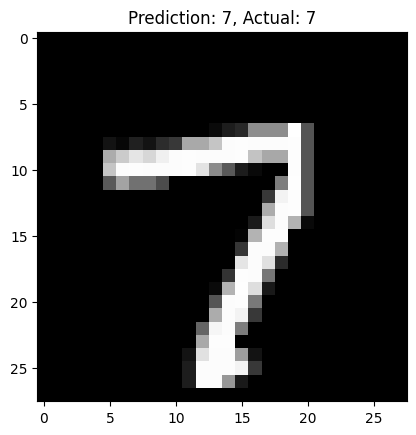

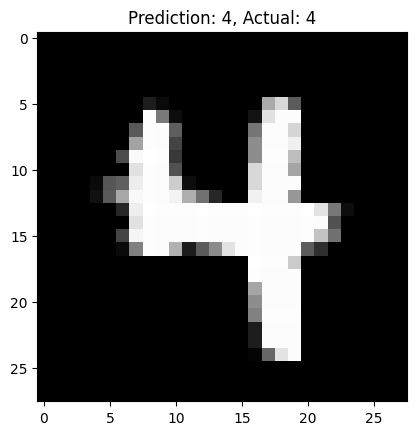

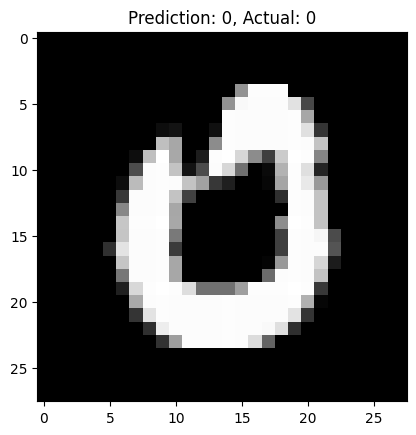

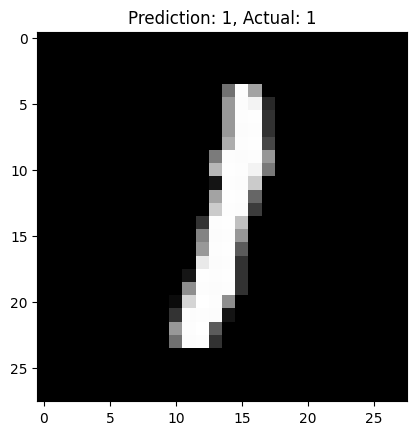

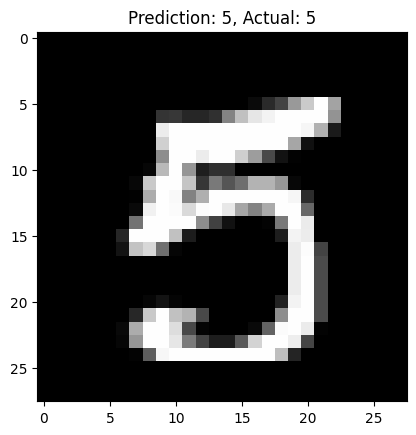

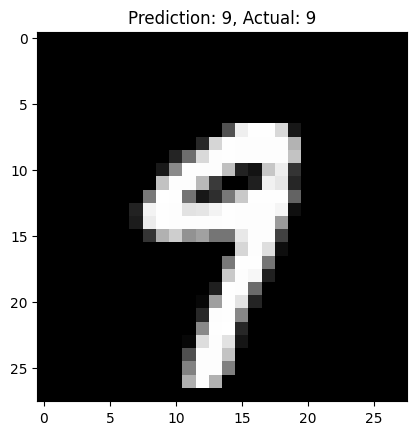

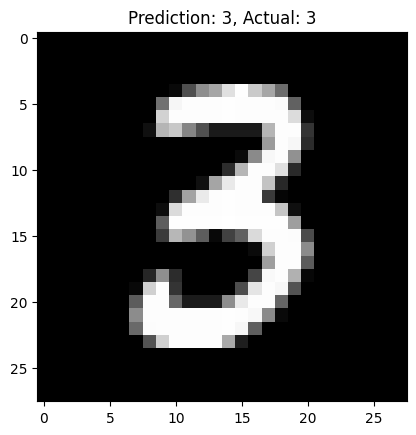

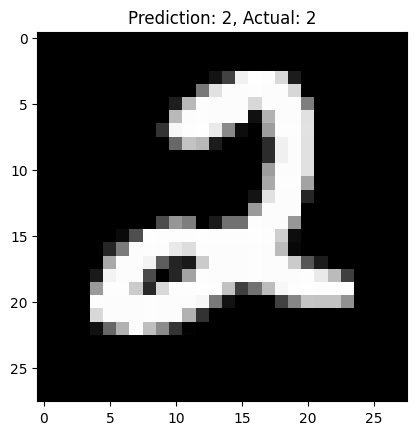

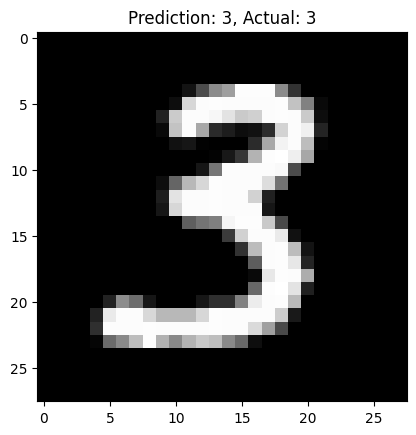

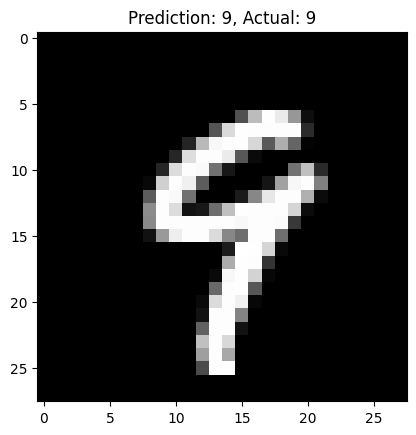

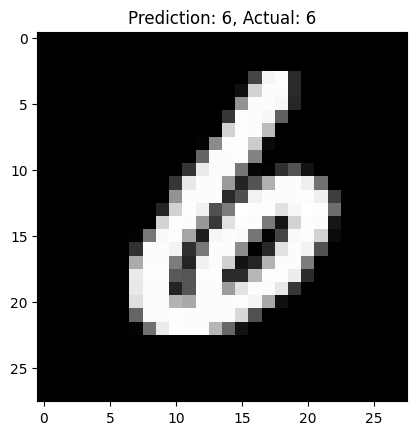

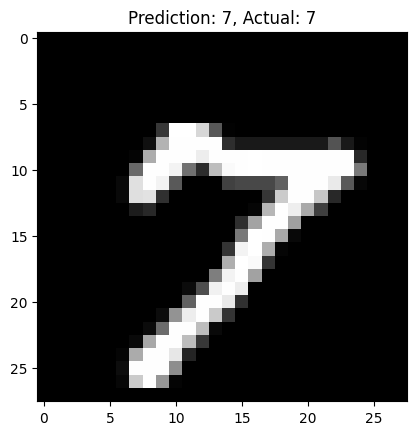

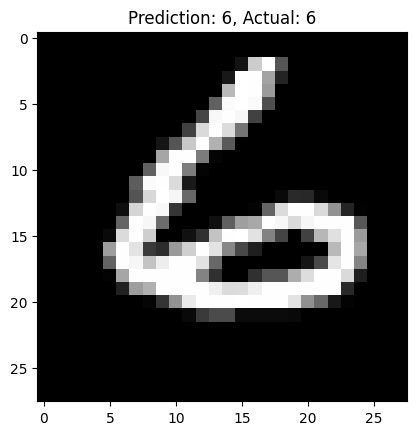

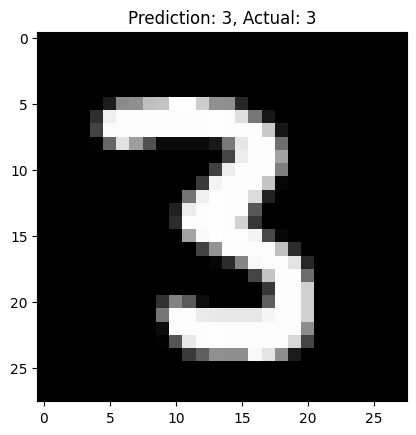

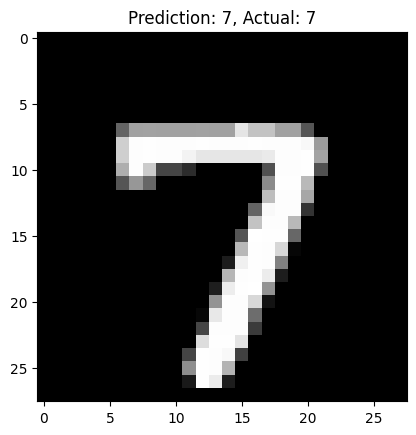

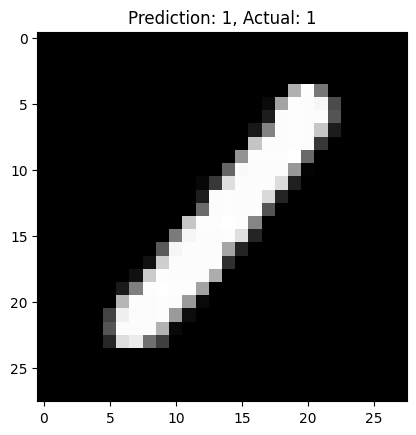

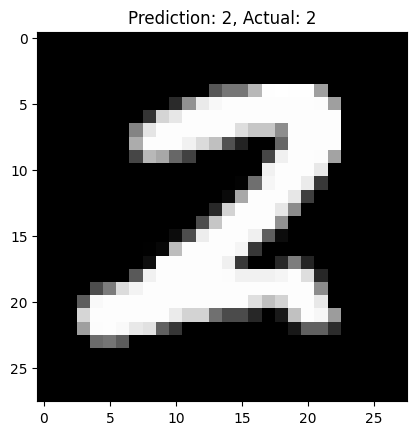

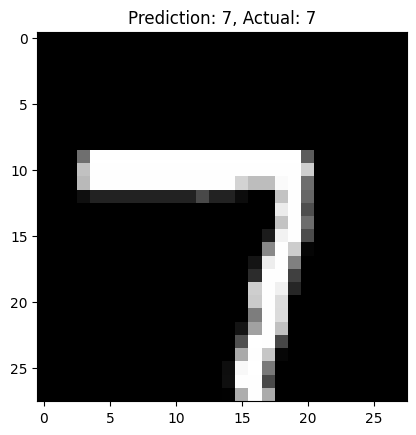

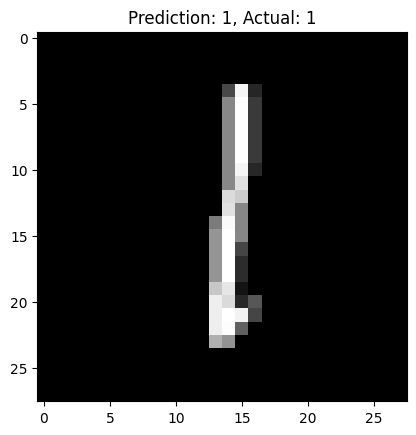

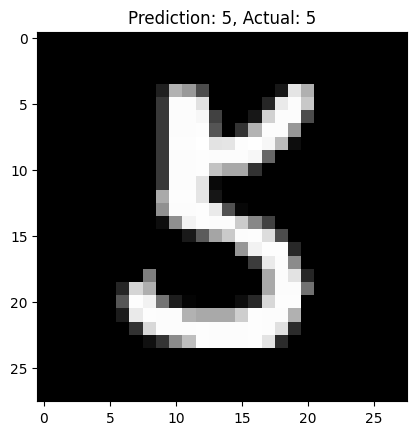

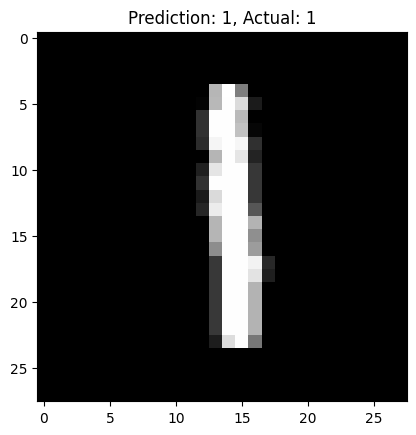

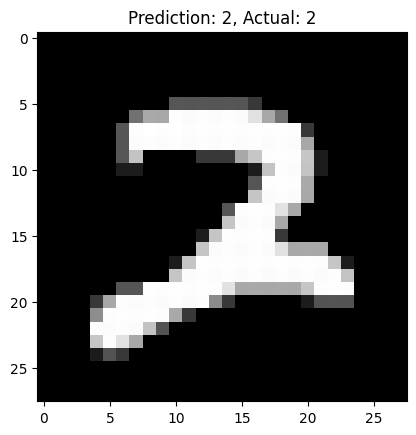

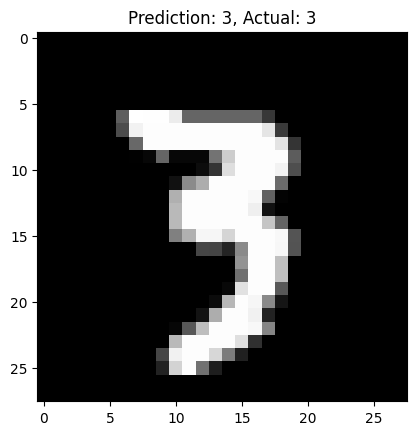

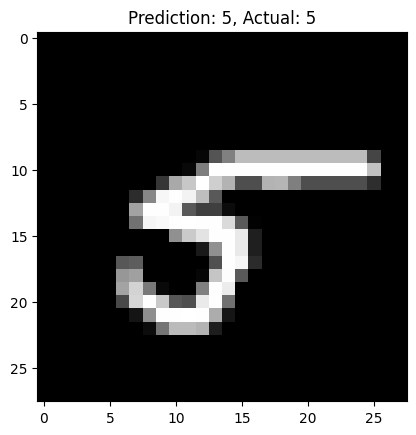

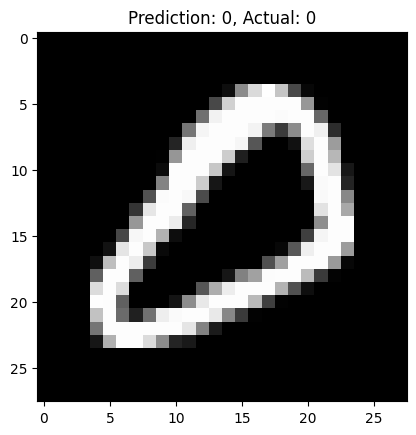

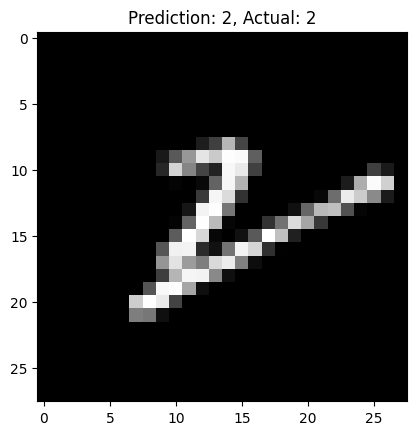

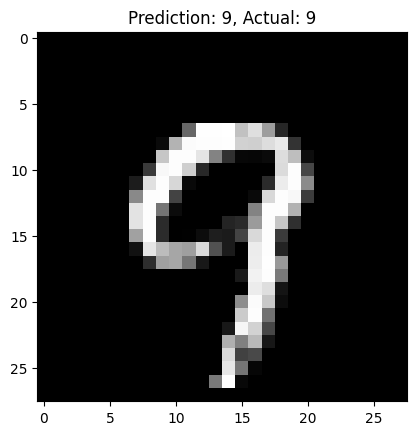

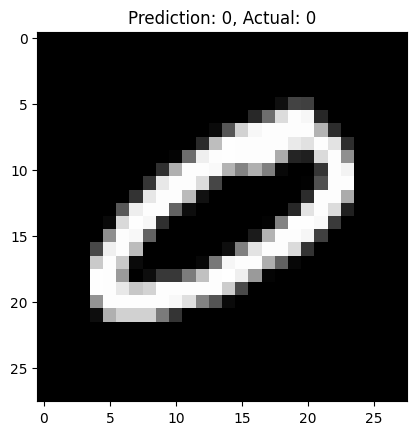

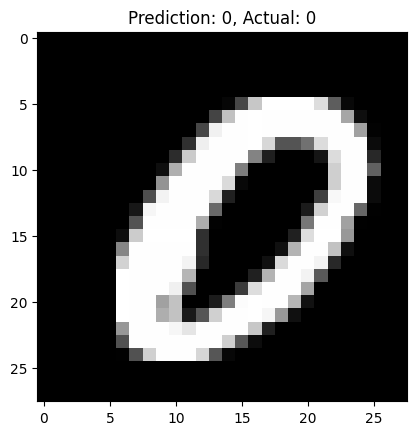

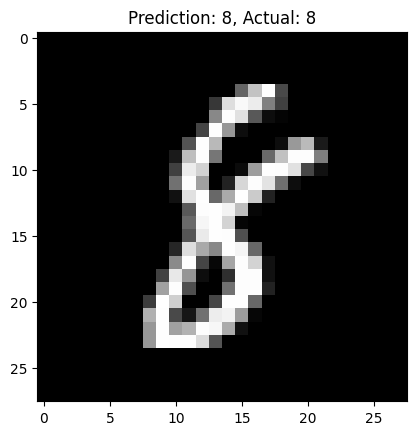

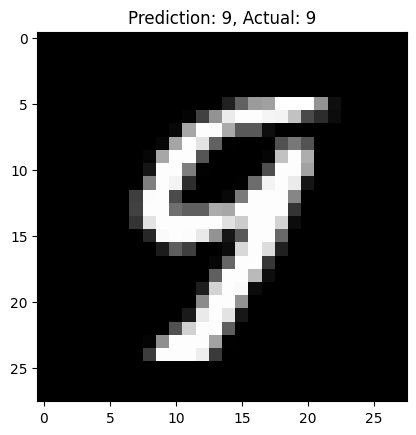

Accuracy = 0.9807


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

inputsize = 784
hiddensize = 500
ncls = 10
n = 15
lr = 0.001
batchsize = 100

traindata = torchvision.datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks', train=True,
                                       transform = transforms.ToTensor(), download = True)
testdata = torchvision.datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks', train=False,
                                       transform = transforms.ToTensor())

trainloader = torch.utils.data.DataLoader(dataset = traindata, batch_size = batchsize, shuffle =True)
testloader = torch.utils.data.DataLoader(dataset = testdata, batch_size = batchsize, shuffle =False)

examples = iter(trainloader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(5):
  plt.subplot(1,5, i+1)
  plt.imshow(samples[i][0], cmap='gray')
#plt.show()

class NeuralNet(nn.Module):
  def __init__(self, inputsize, hiddensize, ncls):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(inputsize, hiddensize)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hiddensize, ncls)


  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out


model = NeuralNet(inputsize, hiddensize, ncls)
model.to(device)

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

nsteps = len(trainloader)

for epoch in range(n):
  for i, (images, labels) in enumerate(trainloader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)
    l = loss(outputs, labels)

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if (i+1)%100 == 0:
      print(f'epoch : {epoch+1}/{n} , step : {i+1}/{nsteps}, loss: {l.item():.4f}')

with torch.no_grad():
  ncorrect = 0
  nsamples = 0

  for images, labels in testloader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, predictions = torch.max(outputs, 1)
    nsamples += labels.shape[0]
    ncorrect += (predictions == labels).sum().item()
    predictions = predictions.cpu()
    labels = labels.cpu()
    images = images.cpu()

    for i in range(len(predictions)):
      image = images[i].reshape(28, 28)
      prediction = predictions[i].item()
      label = labels[i].item()
      plt.imshow(image, cmap='gray')
      plt.title(f'Prediction: {prediction}, Actual: {label}')
      plt.show()
      if i==1:
        break

  acc = ncorrect/nsamples
  print(f'Accuracy = {acc:.4f}')
